## FEATURE EXTRACTION

In [ ]:
# Create the data frames and save them if needed (BEWARE: this will overwrite the existing files and the process can take up to 2 hours)
import pandas as pd
import warnings
import numpy as np
from CreateTable import create_df
warnings.filterwarnings('ignore')
df1 = create_df("Dataset/DamasconeA/data2/*_CPXE_*.csv", offset=(49, 51), angle=1)
df2 = create_df("Dataset/DamasconeA/data1/*_CPXE_*.csv")
df3 = create_df("Dataset/DamasconeB/together/*_CPXE_*.csv")

# Convert None to np.nan
df1 = df1.replace({None: np.nan})
df2 = df2.replace({None: np.nan})
df3 = df3.replace({None: np.nan})

df1.to_pickle("Dataset/DamasconeA2.pkl")
df2.to_pickle("Dataset/DamasconeA.pkl")
df3.to_pickle("Dataset/DamasconeB.pkl")

In [64]:
import pickle
import pandas as pd

data_train = pd.read_pickle("Dataset/DamasconeA2.pkl")
data_validation = pd.read_pickle("Dataset/DamasconeA.pkl")
data_test = pd.read_pickle("Dataset/DamasconeB.pkl")

In [65]:
import numpy as np

data_train['stiffness_to_relaxation'] = data_train['Stiffness'] / data_train['force_relaxation']
data_train['oscillation_to_max_force'] = data_train['force_oscillation'] / data_train['force_max']
data_train['strain_energy_density'] = data_train.apply(
    lambda row: row['energy_input'] / (np.max(row['Pi']) - np.min(row['Pi']))
    if len(row['Pi']) > 0 else np.nan,
    axis=1
)
data_train['energy_dissipation_ratio'] = data_train['hysteresis_area'] / data_train['energy_input']

data_test['stiffness_to_relaxation'] = data_test['Stiffness'] / data_test['force_relaxation']
data_test['oscillation_to_max_force'] = data_test['force_oscillation'] / data_test['force_max']
data_test['strain_energy_density'] = data_test.apply(
    lambda row: row['energy_input'] / (np.max(row['Pi']) - np.min(row['Pi']))
    if len(row['Pi']) > 0 else np.nan,
    axis=1
)
data_test['energy_dissipation_ratio'] = data_test['hysteresis_area'] / data_test['energy_input']

data_validation['stiffness_to_relaxation'] = data_validation['Stiffness'] / data_validation['force_relaxation']
data_validation['oscillation_to_max_force'] = data_validation['force_oscillation'] / data_validation['force_max']
data_validation['strain_energy_density'] = data_validation.apply(
    lambda row: row['energy_input'] / (np.max(row['Pi']) - np.min(row['Pi']))
    if len(row['Pi']) > 0 else np.nan,
    axis=1
)
data_validation['energy_dissipation_ratio'] = data_validation['hysteresis_area'] / data_validation['energy_input']


In [ ]:
data_train = data_train.dropna()
data_test = data_test.dropna()
data_validation = data_validation.dropna()

In [67]:
from helper import feature_list2, feature_list_all

to_remove = ['poly3_coef0', 'poly3_coef1', 'poly3_coef2', 'poly3_coef3',
             'poly4_coef0', 'poly4_coef1', 'poly4_coef2', 'poly4_coef3', 'poly4_coef4',
             'poly5_coef0', 'poly5_coef1', 'poly5_coef2', 'poly5_coef3', 'poly5_coef4',
             # Segmentation features
             'segment2_slope', 'segment3_slope', 'segment2_force_std', 'segment3_force_std',
             'segment2_skew', 'segment3_skew','hysteresis_area']
#feature_list_3 = feature_list = [x for x in feature_list2 + ['stiffness_to_relaxation', 'oscillation_to_max_force'] if x not in to_remove]

feature_list = [x for x in feature_list_all if x not in to_remove]
to_see = [
     # Local stiffness anomaly features
    'local_stiffness_w3', 'local_stiffness_w5', 'local_stiffness_w7',
    'local_stiffness_zscore_w3', 'local_stiffness_zscore_w5', 'local_stiffness_zscore_w7',

    # Spatial pattern features
    'stiffness_harris_response', 'stiffness_edge_response',

    # Surface curvature features
    'surface_mean_curvature', 'surface_gaussian_curvature', 'surface_type',

    # Morphological features (for each threshold)
    'morph_area_mean_t0', 'morph_area_mean_t1', 'morph_area_mean_t2', 'morph_area_mean_t3',
    'morph_area_std_t0', 'morph_area_std_t1', 'morph_area_std_t2', 'morph_area_std_t3',
    'morph_perimeter_mean_t0', 'morph_perimeter_mean_t1', 'morph_perimeter_mean_t2', 'morph_perimeter_mean_t3',
    'morph_perimeter_std_t0', 'morph_perimeter_std_t1', 'morph_perimeter_std_t2', 'morph_perimeter_std_t3',
    'morph_euler_mean_t0', 'morph_euler_mean_t1', 'morph_euler_mean_t2', 'morph_euler_mean_t3',
    'morph_active_ratio_t0', 'morph_active_ratio_t1', 'morph_active_ratio_t2', 'morph_active_ratio_t3',
    'morph_border_touch_ratio_t0', 'morph_border_touch_ratio_t1', 'morph_border_touch_ratio_t2', 'morph_border_touch_ratio_t3',

    # Position context features
    'dist_to_grid_edge', 'is_grid_corner',
]
# feature_list = feature_list_3
# feature_list = ['loading_unloading_area_ratio', 'peak_width', 'stiffness_to_relaxation', 'Stiffness']
# feature_list = ["Stiffness", "Upstroke", "Downstroke", "P_ss"] #, "P_ss", "loading_energy"]peak_position

# feature_list = ['poly4_coef4', 'poly4_coef3', 'poly5_coef0', 'loading_unloading_area_ratio', 'Stiffness', 'quartic_coefficient', 'Upstroke']

In [ ]:
# Get column names from your data
data_columns = set(data_train.columns)
feature_list_set = set(feature_list)
print(f"Feature list: {len(feature_list)}")
# Find columns that are in the data but not in feature_list
extra_columns = data_columns - feature_list_set
print(f"Columns in data but not in feature_list ({len(extra_columns)}):")
print(sorted(extra_columns))

### VISUALIZATION OF FEATURE

In [ ]:
from plotter import plot_features_singledf
print("DATA TRAIN")
plot_features_singledf(data_train, feature_list=to_see)

In [ ]:
print("DATA VALIDATION")
plot_features_singledf(data_validation, feature_list=to_see)

In [ ]:
print("DATA TEST")
plot_features_singledf(data_test, feature_list=to_see)

### SPATIAL SMOOTHING

In [68]:
from scipy.interpolate import NearestNDInterpolator
from scipy.ndimage import median_filter, gaussian_filter
from helper import *

smoothing_config = {
    'Entropy': 'gaussian',
}  # Dictionary 'feature-name' : type of smoothing (set if you want to test other method of smoothing instead of median)


def apply_smoothing(grid_z, method='median'):
    if method == 'median':
        return median_filter(grid_z, size=3, mode='reflect')
    elif method == 'gaussian':
        return gaussian_filter(grid_z, sigma=2)
    elif method == 'diffusion':
        # Simple anisotropic diffusion
        def diffusion_step(img, kappa=50):
            # Compute image gradients
            dy, dx = np.gradient(img)

            # Compute diffusion coefficients
            diff_coef_x = 1 / (1 + (dx / kappa) ** 2)
            diff_coef_y = 1 / (1 + (dy / kappa) ** 2)

            # Compute diffusion
            diff_x = np.zeros_like(img)
            diff_y = np.zeros_like(img)

            diff_x[1:-1, 1:-1] = diff_coef_x[1:-1, 1:-1] * (img[1:-1, 2:] - img[1:-1, 1:-1])
            diff_y[1:-1, 1:-1] = diff_coef_y[1:-1, 1:-1] * (img[2:, 1:-1] - img[1:-1, 1:-1])

            return img + 0.25 * (diff_x + diff_y)

        # Apply multiple diffusion steps
        iterations = 20
        img = grid_z.copy()
        for i in range(iterations):
            img = diffusion_step(img)
        return img

    else:
        raise ValueError(f"Smoothing method not implemented: {method}")


def get_grid_bounds(df):
    x_min, x_max = int(df["posx"].min()), int(df["posx"].max())
    y_min, y_max = int(df["posy"].min()), int(df["posy"].max())
    grid_shape = (y_max - y_min + 1, x_max - x_min + 1)
    return x_min, y_min, grid_shape


# Smoothing function for a single dataframe
def smooth_subset(subset_df, x_min, y_min, grid_shape):

    smoothed_data = {}

    for feature in feature_list:
        # Initialize the grid with NaN values
        grid_z = np.full(grid_shape, np.nan, dtype=np.float32)

        # Map the feature values to the grid
        for _, row in subset_df.iterrows():
            x_idx = int(row["posx"]) - x_min
            y_idx = int(row["posy"]) - y_min
            grid_z[y_idx, x_idx] = row[feature]

        # Interpolate NaN values
        yy, xx = np.indices(grid_z.shape)
        valid_mask = ~np.isnan(grid_z)

        if np.any(~valid_mask):
            interpolator = NearestNDInterpolator(
                np.column_stack((yy[valid_mask], xx[valid_mask])),
                grid_z[valid_mask]
            )
            grid_z = interpolator(yy, xx)

        # Smooth the grid
        method = smoothing_config.get(feature, 'median')
        grid_z = apply_smoothing(grid_z, method=method)

        # Store the smoothed values back in the DataFrame
        smoothed_data[feature] = [
            grid_z[int(row["posy"]) - y_min, int(row["posx"]) - x_min]
            for _, row in subset_df.iterrows()
        ]

    # Create a new DataFrame with the smoothed data
    smoothed_subset = pd.DataFrame(smoothed_data, index=subset_df.index)

    # Add the original label and position columns
    smoothed_subset[['label', 'posx', 'posy']] = subset_df[['label', 'posx', 'posy']]

    return smoothed_subset


if smoothing_config is None:
    smoothing_config = {feature: 'median' for feature in feature_list}

# Compute grid bounds and smooth each subset
test_x_min, test_y_min, test_grid_shape = get_grid_bounds(data_test)
train_x_min, train_y_min, train_grid_shape = get_grid_bounds(data_train)
val_x_min, val_y_min, val_grid_shape = get_grid_bounds(data_validation)

# Smooth each subset SEPARATELY
smoothed_test = smooth_subset(data_test, test_x_min, test_y_min, test_grid_shape)
smoothed_train = smooth_subset(data_train, train_x_min, train_y_min, train_grid_shape)
smoothed_validation = smooth_subset(data_validation, val_x_min, val_y_min, val_grid_shape)

smoothed_df = pd.concat([smoothed_test, smoothed_train],ignore_index=True)  # For visualization in the next sections only

## DB SPLITTING

### Binary Classifier

Class distribution in the dataset:
Label 0: 4608 samples (35.12%)
Label 1: 395 samples (3.01%)
Label 2: 391 samples (2.98%)
Label 3: 378 samples (2.88%)
Label 4: 391 samples (2.98%)
Label 5: 396 samples (3.02%)
Class distribution in the dataset:
Label 0: 4616 samples (35.19%)
Label 1: 390 samples (2.97%)
Label 2: 390 samples (2.97%)
Label 3: 384 samples (2.93%)
Label 4: 390 samples (2.97%)
Label 5: 390 samples (2.97%)


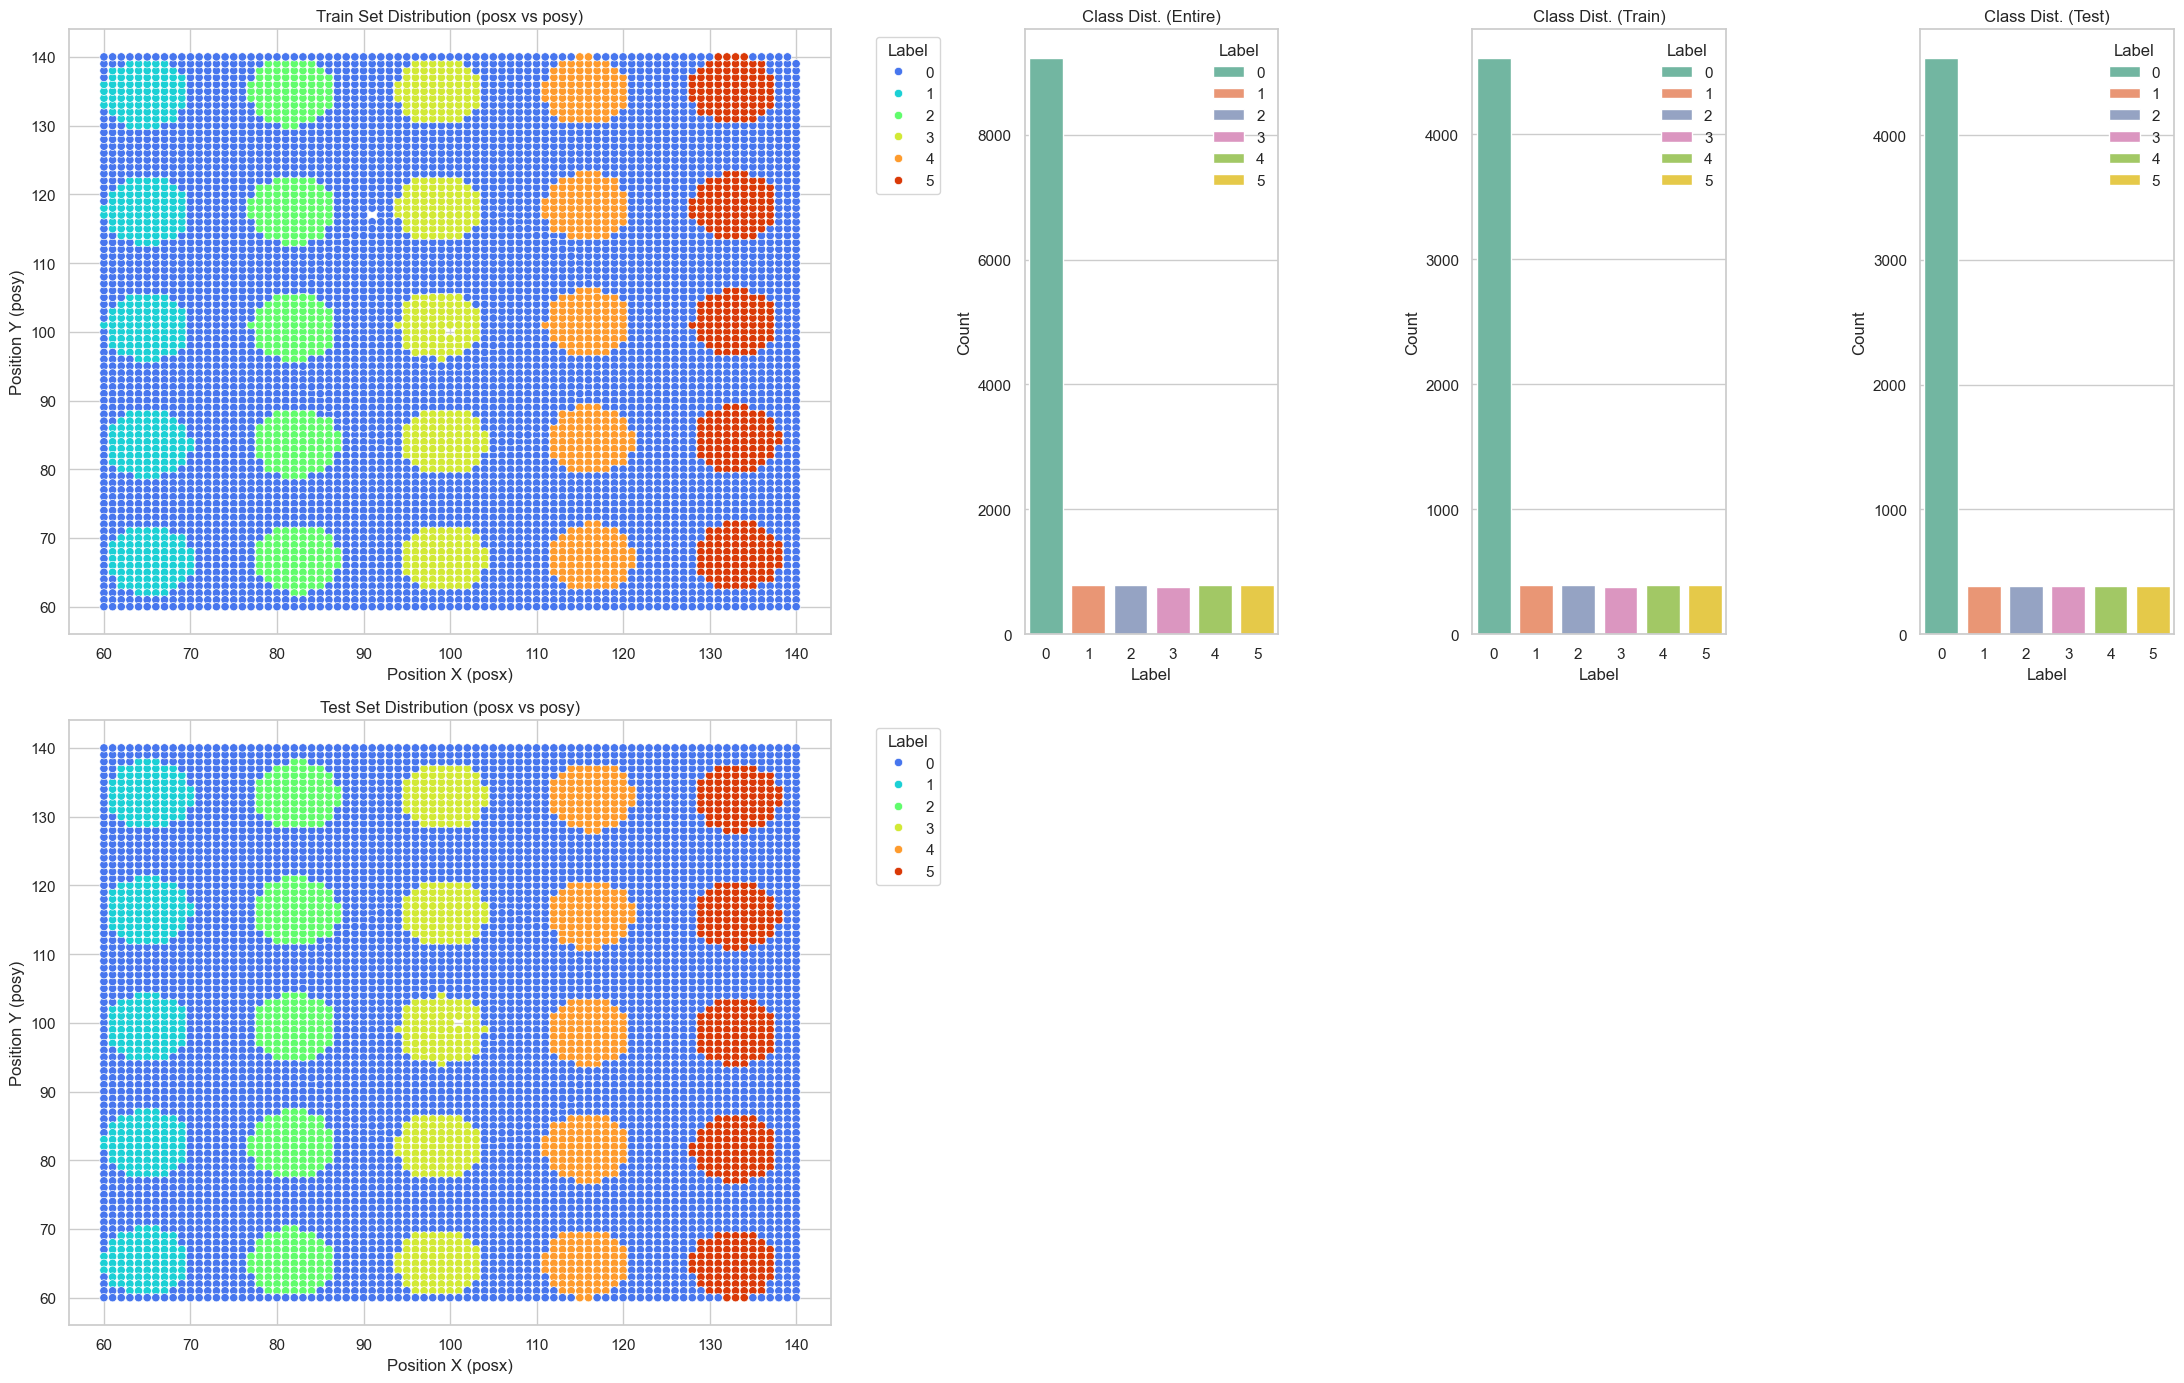

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score
from imblearn.over_sampling import ADASYN
import warnings
from sklearn.exceptions import UndefinedMetricWarning
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

# Display class distribution
X = smoothed_df[feature_list + ["posx", "posy"]]
y = smoothed_df['label']

# train_df = pd.concat([train_df1, train_df2], ignore_index=True)
# smoothed_train = pd.concat([smoothed_train1, smoothed_train2], ignore_index=True)

# Training distribution:
class_distribution = Counter(smoothed_train['label'])
print("Class distribution in the dataset:")
for label, count in sorted(class_distribution.items()):
    print(f"Label {label}: {count} samples ({count / len(y) * 100:.2f}%)")

# Test distribution:
class_distribution = Counter(smoothed_test['label'])
print("Class distribution in the dataset:")
for label, count in sorted(class_distribution.items()):
    print(f"Label {label}: {count} samples ({count / len(y) * 100:.2f}%)")

# Prepare data for classification
X_train = smoothed_train[feature_list + ["posx", "posy"]]
y_train = smoothed_train['label']

X_test = smoothed_test[feature_list + ["posx", "posy"]]
y_test = smoothed_test['label']

X_validation = smoothed_validation[feature_list + ["posx", "posy"]]
y_validation = smoothed_validation['label']

# Create the figure and axes: 2 rows (train/test), then 3 histograms
fig, axs = plt.subplots(2, 4, figsize=(22, 14), gridspec_kw={'width_ratios': [3, 1, 1, 1]})

# Set style
sns.set(style="whitegrid")

# Create consistent color map using turbo
unique_labels = sorted(data_train['label'].unique())  # or union of train + test if needed
palette_colors = sns.color_palette("turbo", n_colors=len(unique_labels))
label_color_dict = {label: color for label, color in zip(unique_labels, palette_colors)}

# Plot train
sns.scatterplot(
    data=data_train,
    x='posx',
    y='posy',
    hue='label',
    palette=label_color_dict,  # Use fixed mapping
    ax=axs[0, 0]
)
axs[0, 0].set_title("Train Set Distribution (posx vs posy)")
axs[0, 0].set_xlabel("Position X (posx)")
axs[0, 0].set_ylabel("Position Y (posy)")
axs[0, 0].legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot test with same label-color mapping
sns.scatterplot(
    data=data_test,
    x='posx',
    y='posy',
    hue='label',
    palette=label_color_dict,  # Same dictionary ensures color consistency
    ax=axs[1, 0]
)
axs[1, 0].set_title("Test Set Distribution (posx vs posy)")
axs[1, 0].set_xlabel("Position X (posx)")
axs[1, 0].set_ylabel("Position Y (posy)")
axs[1, 0].legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Histograms / Class Distribution Plots ---
plot_class_distribution(smoothed_df['label'], axs[0, 1], "Class Dist. (Entire)")
plot_class_distribution(y_train, axs[0, 2], "Class Dist. (Train)")
plot_class_distribution(y_test, axs[0, 3], "Class Dist. (Test)")

# Hide the unused bottom row histograms
for ax in axs[1, 1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# # Drop posx and posy columns from the training and testing sets after plotting
#X_train = X_train.drop(columns=['posx', 'posy'])
#X_test = X_test.drop(columns=['posx', 'posy'])

In [70]:
from sklearn.preprocessing import StandardScaler

scaler_train1 = StandardScaler()
scaler_train2 = StandardScaler()
scaler_test = StandardScaler()

X_train_selected = X_train[feature_list]
X_test_selected = X_test[feature_list]
X_validation_selected = X_validation[feature_list]

# Find the duplicates in feature_list
# X_train_selected_1 = X_train_selected[X_train["posy"] <= 140]
# X_train_selected_2 = X_train_selected[X_train["posy"] > 140]

X_train_scaled = scaler_train1.fit_transform(X_train_selected)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_list, index=X_train_selected.index)

X_validation_scaled = scaler_train1.fit_transform(X_validation_selected)
X_validation_scaled = pd.DataFrame(X_validation_scaled, columns=feature_list, index=X_validation_selected.index)

# X_train_scaled2 = scaler_train2.fit_transform(X_train_selected_2)

# X_train_scaled1 = pd.DataFrame(X_train_scaled1, columns=feature_list, index=X_train_selected_1.index)
# X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=feature_list, index=X_train_selected_2.index)
# X_train_scaled = pd.concat([X_train_scaled1, X_train_scaled2]).sort_index()

X_test_scaled = scaler_test.fit_transform(X_test_selected)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_list, index=X_test_selected.index)

Plotting overall feature importance...


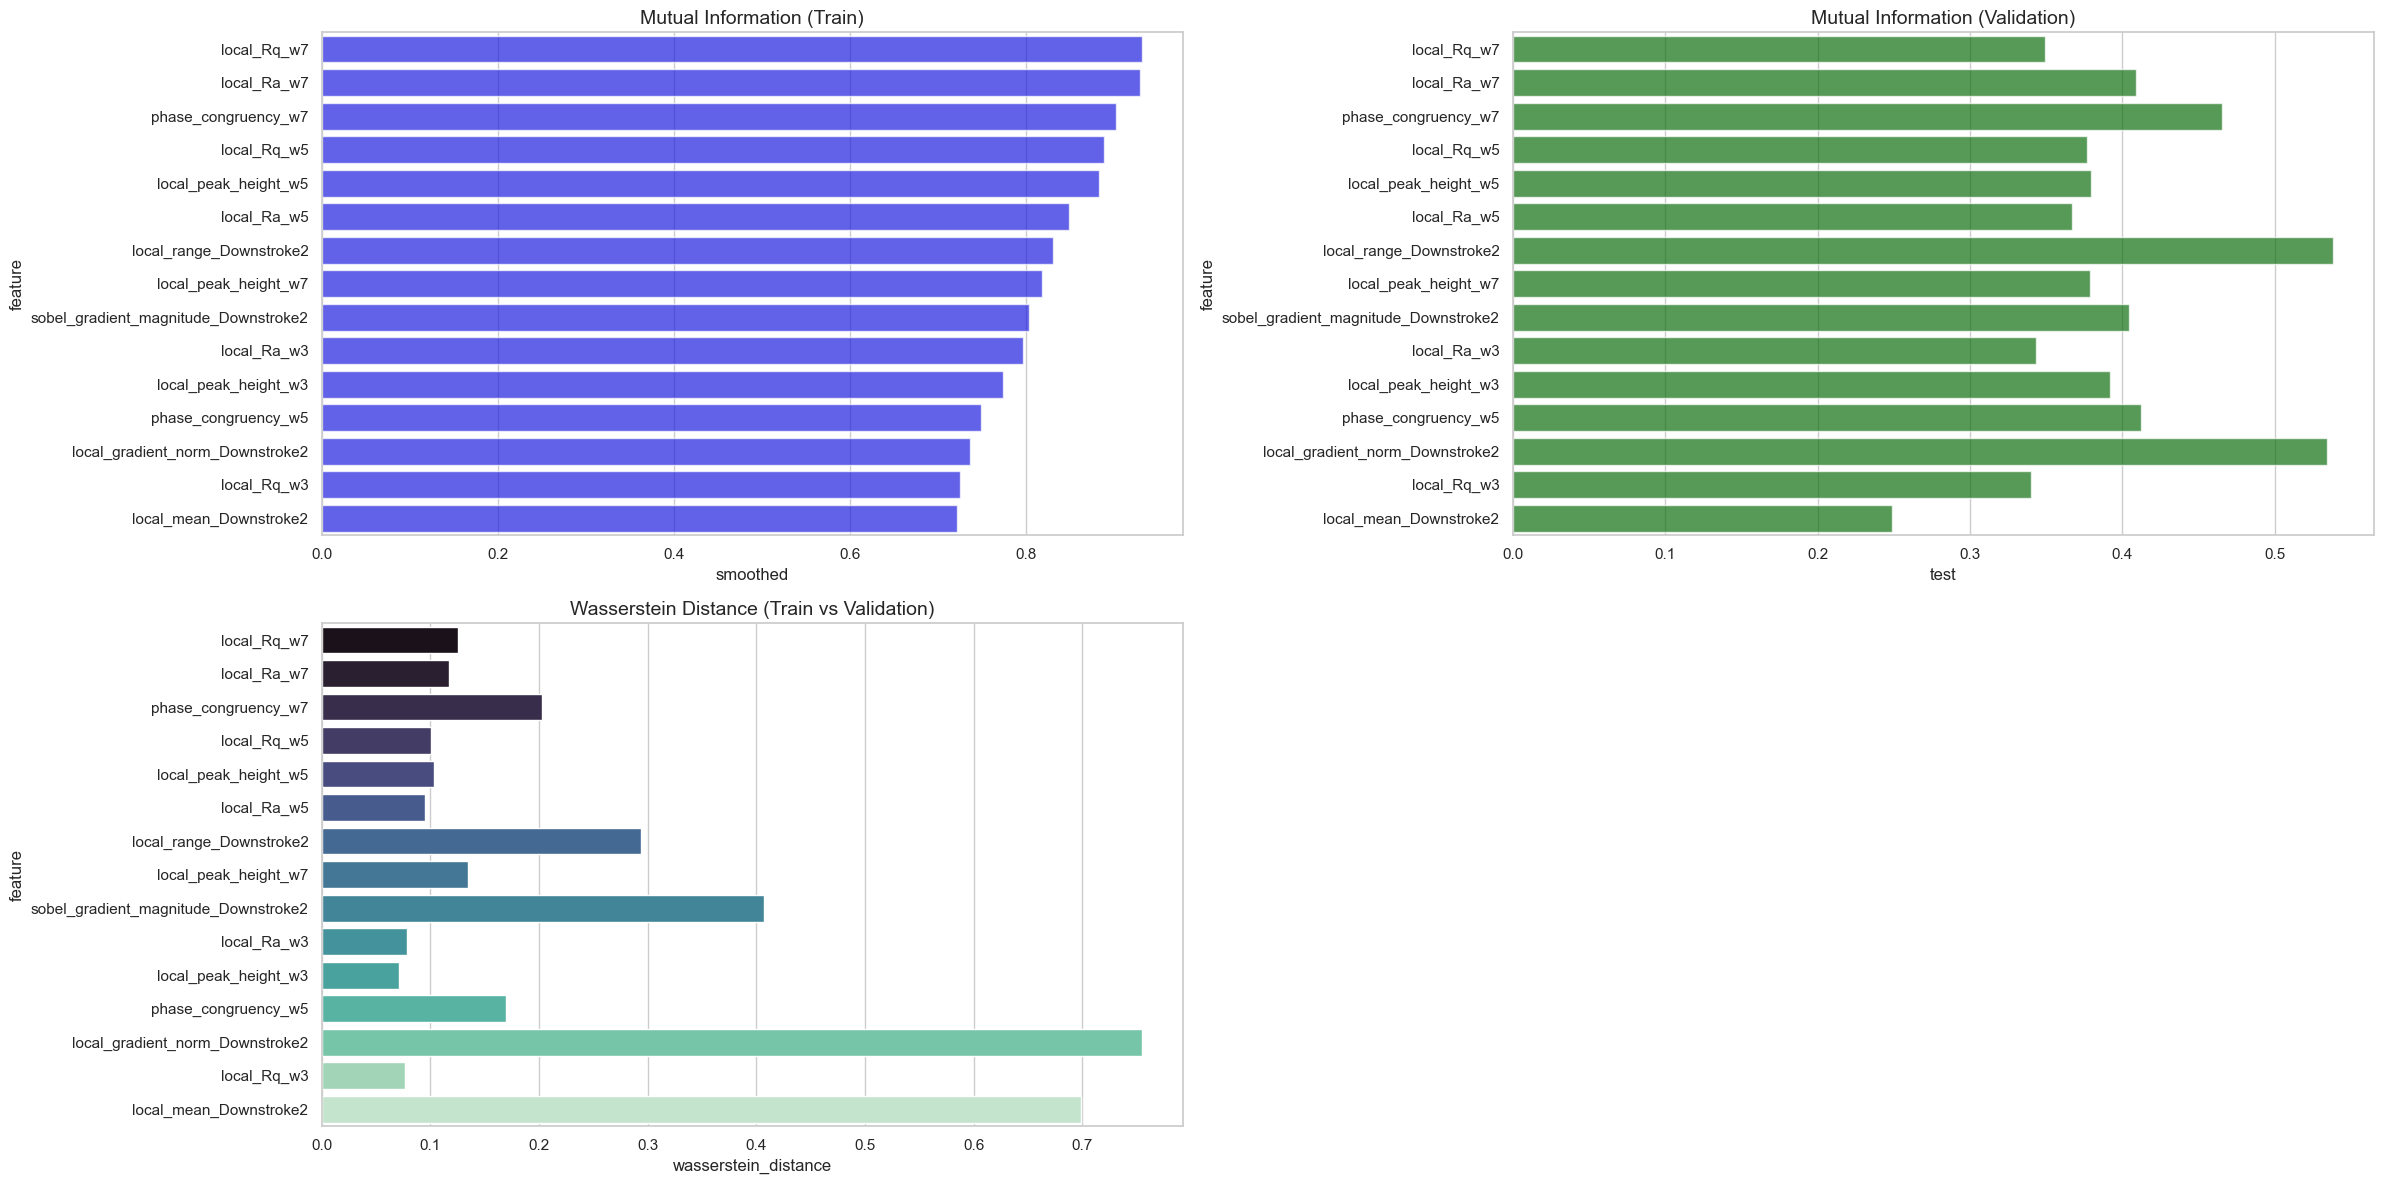


 Selected Features (0):
  - MI threshold: 0.3
  - MI threshold: 0.1
  - Wasserstein threshold: 0.1
  - Per-class Wasserstein threshold: 0.1
  No features met all criteria. Consider relaxing thresholds.


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance, ks_2samp
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import pairwise_distances
import warnings

warnings.filterwarnings('ignore')


def calculate_mutual_info(X_data, y_data, feature_list, random_state=42):
    """Calculate mutual information scores for features."""
    return mutual_info_classif(X_data[feature_list], y_data, random_state=random_state)


def calculate_wasserstein_distances(train_data, validation_data, feature_list):
    """Calculate Wasserstein distance between train and validation for each feature."""
    distances = []

    for feature in feature_list:
        distance = wasserstein_distance(train_data[feature], validation_data[feature])
        distances.append({'feature': feature, 'wasserstein_distance': distance})

    return pd.DataFrame(distances)


def calculate_distribution_metrics(train_data, validation_data, feature_list):
    """Calculate distribution metrics between train and validation sets."""
    metrics = []

    for feature in feature_list:
        # Wasserstein distance (Earth Mover's Distance)
        w_distance = wasserstein_distance(train_data[feature], validation_data[feature])

        # Kolmogorov-Smirnov test
        ks_stat, ks_pval = ks_2samp(train_data[feature], validation_data[feature])

        metrics.append({
            'feature': feature,
            'wasserstein_distance': w_distance,
            'ks_statistic': ks_stat,
            'ks_pvalue': ks_pval
        })

    return pd.DataFrame(metrics)


def calculate_class_distribution_metrics(X_train, y_train, X_validation, y_validation, feature_list, selected_classes):
    """Calculate distribution metrics for each selected class."""
    class_metrics = {}

    for cls in selected_classes:
        # Filter data for this class
        X_train_cls = X_train[y_train == cls]
        X_val_cls = X_validation[y_validation == cls]

        # Calculate metrics for this class
        metrics_df = calculate_distribution_metrics(X_train_cls, X_val_cls, feature_list)
        class_metrics[cls] = metrics_df

    return class_metrics


def plot_feature_importance(mi_df, metrics_df, figsize=(24, 12)):
    """Plot mutual information and distribution metrics for features."""
    fig, axes = plt.subplots(2, 2, figsize=figsize)

    # Ensure both dataframes have the same feature ordering
    mi_df = mi_df.sort_values('smoothed', ascending=False)

    # Merge to maintain the same order
    merged_df = mi_df[['feature']].merge(metrics_df, on='feature')

    # Plot Mutual Information
    sns.barplot(x='smoothed', y='feature', data=mi_df.head(15),
                color='blue', alpha=0.7, ax=axes[0, 0])
    sns.barplot(x='test', y='feature', data=mi_df.head(15),
                color='green', alpha=0.7, ax=axes[0, 1])

    axes[0, 0].set_title('Mutual Information (Train)', fontsize=14)
    axes[0, 1].set_title('Mutual Information (Validation)', fontsize=14)

    # Plot Wasserstein Distance only
    sns.barplot(x='wasserstein_distance', y='feature', data=merged_df.head(15),
                palette='mako', ax=axes[1, 0])
    axes[1, 0].set_title('Wasserstein Distance (Train vs Validation)', fontsize=14)

    # Turn off the unused subplot
    axes[1, 1].axis('off')

    plt.tight_layout()
    return fig


def visualize_feature_distributions(X_train, y_train, X_validation, y_validation,
                                    selected_features, selected_classes):
    figsize = (3 * len(selected_classes), 3 * len(selected_features))
    fig, axes = plt.subplots(len(selected_features), len(selected_classes), figsize=figsize)

    for i, feature in enumerate(selected_features):
        for j, cls in enumerate(selected_classes):
            ax = axes[i, j] if len(selected_features) > 1 else axes[j]

            # Filter data for the class
            train_data = X_train[y_train == cls][feature]
            val_data = X_validation[y_validation == cls][feature]

            # Plot distributions
            sns.histplot(train_data, kde=True, color='blue', alpha=0.5,
                         ax=ax, label='Train', stat='density')
            sns.histplot(val_data, kde=True, color='green', alpha=0.5,
                         ax=ax, label='Validation', stat='density')

            # Calculate Wasserstein distance for this feature and class
            w_dist = wasserstein_distance(train_data, val_data)

            ax.set_title(f"Class {cls}, Feature: {feature}\nWasserstein = {w_dist:.4f}", fontsize=10)

            if i == 0:
                ax.legend()

            if i == len(selected_features) - 1:
                ax.set_xlabel(feature)
            else:
                ax.set_xlabel('')

            if j == 0:
                ax.set_ylabel('Density')
            else:
                ax.set_ylabel('')

    plt.tight_layout()
    return fig


def select_features_advanced(mi_df, metrics_df, class_metrics, selected_classes,
                             mi_threshold=0.5, wasserstein_threshold=0.12,
                             class_wasserstein_threshold=None,
                             ):
    """
    Select features based on multiple criteria:
    1. High mutual information in both train and validation
    2. Low relative MI difference between train and validation
    3. Low overall distribution distances between train and validation
    4. Low per-class distribution distances
    """

    # Step 1: Filter by mutual information with stricter stability condition
    mi_selected = mi_df[
        (mi_df['smoothed'] > mi_threshold) &
        (mi_df['test'] > mi_threshold)
    ]

    # Step 2: Filter by overall distribution metrics
    dist_selected = metrics_df[metrics_df['wasserstein_distance'] < wasserstein_threshold]

    # Combine filters
    combined = mi_selected[['feature']].merge(dist_selected[['feature']], on='feature')
    combined_features = combined['feature'].tolist()

    # Step 3: Filter by per-class distribution metrics
    if class_wasserstein_threshold is not None:
        final_features = []
        for feature in combined_features:
            ok = True
            for cls in selected_classes:
                cls_df = class_metrics[cls]
                w_dist = cls_df.loc[cls_df['feature'] == feature, 'wasserstein_distance'].values[0]
                if w_dist > class_wasserstein_threshold:
                    ok = False
                    break
            if ok:
                final_features.append(feature)
    else:
        final_features = combined_features

    return final_features


def find_best_features(X_train_scaled, y_train, X_validation_scaled, y_validation, feature_list,
                       selected_classes, mi_threshold=0.5, wasserstein_threshold=0.1,mi_relative_diff_threshold=0.1,
                       class_wasserstein_threshold=None, plot=False):
    """Enhanced main function to perform feature selection analysis with per-class threshold."""
    # Filter data for selected classes
    train_mask = y_train.isin(selected_classes)
    X_train_filtered = X_train_scaled[train_mask]
    y_train_filtered = y_train[train_mask]

    test_mask = y_validation.isin(selected_classes)
    X_val_filtered = X_validation_scaled[test_mask]
    y_val_filtered = y_validation[test_mask]

    # Calculate mutual information for train and validation sets
    mi_scores_train = calculate_mutual_info(X_train_filtered, y_train_filtered, feature_list)
    mi_scores_val = calculate_mutual_info(X_val_filtered, y_val_filtered, feature_list)

    mi_df = pd.DataFrame({
        'feature': feature_list,
        'smoothed': mi_scores_train,
        'test': mi_scores_val,
    })

    # Calculate overall distribution metrics
    metrics_df = calculate_distribution_metrics(X_train_filtered, X_val_filtered, feature_list)

    # Calculate class-specific distribution metrics
    class_metrics = calculate_class_distribution_metrics(
        X_train_filtered, y_train_filtered,
        X_val_filtered, y_val_filtered,
        feature_list, selected_classes
    )

    # Select features based on enhanced criteria
    selected_features = select_features_advanced(
        mi_df, metrics_df, class_metrics, selected_classes,
        mi_threshold, wasserstein_threshold,
        class_wasserstein_threshold
    )

    if plot:
        print("Plotting overall feature importance...")
        plot_feature_importance(mi_df, metrics_df)
        plt.show()

        if len(selected_features) > 0:
            visualize_feature_distributions(
                X_train_filtered, y_train_filtered,
                X_val_filtered, y_val_filtered,
                selected_features, selected_classes
            )
            plt.show()

        print(f"\n Selected Features ({len(selected_features)}):")
        print(f"  - MI threshold: {mi_threshold}")
        print(f"  - MI threshold: {mi_relative_diff_threshold}")
        print(f"  - Wasserstein threshold: {wasserstein_threshold}")
        if class_wasserstein_threshold is not None:
            print(f"  - Per-class Wasserstein threshold: {class_wasserstein_threshold}")

        if len(selected_features) > 0:
            for i, feature in enumerate(selected_features, 1):
                print(f"  {i}. {feature}")
        else:
            print("  No features met all criteria. Consider relaxing thresholds.")

    return selected_features


selected_features = find_best_features(
    X_train_scaled=X_train_scaled,
    y_train=y_train,
    X_validation_scaled=X_validation_scaled,
    y_validation=y_validation,
    feature_list=feature_list,
    selected_classes=[2, 3, 4, 5],
    mi_threshold=0.3,
    wasserstein_threshold=0.1,
    class_wasserstein_threshold=0.1,
    mi_relative_diff_threshold=0.1,
    plot=True
)


In [77]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from tqdm import tqdm


def find_best_smoothing_params(
        df,
        features_to_smooth,
        class_label_col,
        bandwidth_values,
        center_emphasis_values,
):
    """
    For each (bw,ce) in the grid, smooth the df, then compute
    silhouette_score on the smoothed feature matrix (only the smoothed
    features), using the true class labels in `class_label_col`.
    Returns a DataFrame of scores and the best (bw, ce).
    """
    results = []
    true_labels = df[class_label_col].values

    for bw in tqdm(bandwidth_values, desc="bandwidth"):
        for ce in center_emphasis_values:
            # 1) smooth
            selected_features = find_best_features(
                X_train_scaled=X_train_scaled,
                y_train=y_train,
                X_validation_scaled=X_validation_scaled,
                y_validation=y_validation,
                feature_list=feature_list,
                selected_classes=[2, 3, 4, 5],
                mi_threshold=0.3,
                wasserstein_threshold=bw,
                class_wasserstein_threshold=ce
            )

            X = df[selected_features].values

            try:
                score = silhouette_score(X, true_labels)
            except ValueError:
                score = np.nan

            results.append({
                'w_th': bw,
                'cw_th': ce,
                'n_features': len(selected_features),
                'features': selected_features,
                'silhouette': score
            })

    results_df = pd.DataFrame(results)
    # pick the best
    best = results_df.loc[results_df['silhouette'].idxmax()]
    return results_df, best['w_th'], best['cw_th'], best['silhouette']


bw_vals = np.arange(0, 0.2, 0.025).tolist()
ce_vals = np.arange(0, 0.2, 0.025).tolist()
features = [f for f in feature_list if f not in ['posx', 'posy', 'label', 'class']]

df_all = pd.concat([X_train_scaled, X_validation_scaled], axis=0, ignore_index=True)
df_all['class'] = pd.concat([y_train, y_validation], axis=0, ignore_index=True)

results_df, best_bw, best_ce, best_score = find_best_smoothing_params(
    df=df_all,
    features_to_smooth=features,
    class_label_col='class',
    bandwidth_values=bw_vals,
    center_emphasis_values=ce_vals
)

print("Best params:", best_bw, best_ce, ". silhouette:", best_score)
results_df = results_df.dropna()

# keeps the best silhouette score for equal number of features
results_df = results_df.loc[results_df.groupby('n_features')['silhouette'].idxmax()].reset_index(drop=True)
results_df = results_df[results_df["silhouette"] > 0]
results_df

bandwidth:   0%|          | 0/8 [00:06<?, ?it/s]

KeyboardInterrupt



In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from trainer import *

models = [
    ('SVM', SVC(kernel='rbf', C=0.5, gamma='scale', probability=True, random_state=42)),  # n_jobs not supported
    ('KNN', KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2, n_jobs=-1)),
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('Naive Bayes', GaussianNB()),  # no n_jobs
]

for features_set in results_df["features"].tolist():
    X_train_selected = X_train_scaled[features_set]
    X_test_selected = X_test_scaled[features_set]
    X_validation_selected = X_validation_scaled[features_set]

    # Convert labels to binary classification (0 vs all)
    y_train_binary = np.where(y_train == 0, 0, 1)
    y_test_binary = np.where(y_test == 0, 0, 1)

    # Apply ADASYN for class imbalance handling
    adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=10)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_selected, y_train_binary)

    results = fit_and_evaluate_models(models, X_train_adasyn, y_train_adasyn, X_test_selected, y_test_binary)
    plot_model_comparison(results)
    print("\n\n")

In [ ]:
from plotter import plot_features

X_train_nz = X_train_scaled.copy()
X_train_nz["label"] = y_train
X_train_nz["posy"] = X_train["posy"]
X_train_nz["posx"] = X_train["posx"]

X_test_new_nz = X_test_scaled.copy()
X_test_new_nz["label"] = y_test
X_test_new_nz["posx"] = X_test["posx"]
X_test_new_nz["posy"] = X_test["posy"]

X_val_new_nz = X_validation_scaled.copy()
X_val_new_nz["label"] = y_validation
X_val_new_nz["posx"] = X_validation["posx"]
X_val_new_nz["posy"] = X_validation["posy"]

# plot_features(X_train_nz, X_test_new_nz, feature_list)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Create dataset with selected features (excluding posx, posy)
# X_train_selected = X_train[feature_list]
# X_test_selected = X_test[feature_list]

X_train_selected = X_train_scaled[feature_list]
X_test_selected = X_test_scaled[feature_list]
X_validation_selected = X_validation_scaled[feature_list]

# Convert labels to binary classification (0 vs all)
y_train_binary = np.where(y_train == 0, 0, 1)
y_test_binary = np.where(y_test == 0, 0, 1)

# Apply ADASYN for class imbalance handling
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=10)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_selected, y_train_binary)
# X_train_adasyn, y_train_multi = X_train_selected, y_train

# Display new class distribution after ADASYN
adasyn_class_distribution = Counter(y_train_adasyn)
print("\nClass distribution after ADASYN:")
for label, count in sorted(adasyn_class_distribution.items()):
    print(f"Label {label}: {count} samples ({count / len(y_train_adasyn) * 100:.2f}%)")

# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=5,
    bootstrap=True,
    criterion='entropy',
    class_weight=None,
    random_state=42,
    max_features=0.5,
    n_jobs=-1,
)

# Fit the model on binary data
rf_model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on training data
y_train_pred = rf_model.predict(X_train_adasyn)

# Make predictions on test data
y_test_pred = rf_model.predict(X_test_selected)

y_validation_pred = rf_model.predict(X_validation_selected)

# Evaluate the model on test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test_binary, y_test_pred, zero_division=0))

# Calculate performance metrics
test_accuracy = accuracy_score(y_test_binary, y_test_pred)
test_balanced_acc = balanced_accuracy_score(y_test_binary, y_test_pred)
train_accuracy = accuracy_score(y_train_adasyn, y_train_pred)
train_balanced_acc = balanced_accuracy_score(y_train_adasyn, y_train_pred)

print(f"\nTrain Accuracy: {train_accuracy:.3f}, Train Balanced Accuracy: {train_balanced_acc:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}, Test Balanced Accuracy: {test_balanced_acc:.3f}")


# Function to create and plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_norm = np.nan_to_num(cm_norm)  # Replace NaN with 0

    sns.heatmap(cm_norm, annot=True, fmt='.3f', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1], ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')


# Create a figure with two subplots for the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot confusion matrices for training and test data
plot_confusion_matrix(y_train_adasyn, y_train_pred, 'Training Data Confusion Matrix', ax1)
plot_confusion_matrix(y_test_binary, y_test_pred, 'Test Data Confusion Matrix', ax2)

plt.tight_layout()
plt.show()


In [ ]:
hard_spots_test_index = y_test_pred == 1
hard_spots_test = X_test_new_nz[hard_spots_test_index]
y_test_hard = y_test[hard_spots_test_index]

hard_spots_val_index = y_validation != 0
hard_spots_validation = X_val_new_nz[hard_spots_val_index]
y_validation_hard = y_validation[hard_spots_val_index]

# y_train_pred = rf_model.predict(X_train[feature_list])
hard_spots_train_index = y_train != 0
hard_spots_train = X_train_nz[hard_spots_train_index]
y_train_hard = y_train[hard_spots_train_index]

In [ ]:
from plotter import *


def grid_max_smooth(df, features_to_smooth, grid_range=1):
    """
    Efficiently smooth each feature using a 3x3 grid around each point.
    """
    df_smoothed = df.copy()

    # Create a spatial index - a dictionary mapping (x,y) to row index position O(1) - instead of repeated search
    spatial_index = {}
    for i, (idx, row) in enumerate(df.iterrows()):
        spatial_index[(row['posx'], row['posy'])] = i

    # Process each feature
    for feature in features_to_smooth:
        if feature not in df.columns or feature in ['posx', 'posy', 'label']:
            continue

        feature_values = df[feature].values  # Cache the feature values array
        smoothed_values = np.empty_like(feature_values)

        # For each position in the original dataframe
        for i, (idx, row) in enumerate(df.iterrows()):
            x, y = row['posx'], row['posy']
            grid_values = []

            # Check each cell in the 3x3 grid
            for dx in range(-grid_range, grid_range + 1):
                for dy in range(-grid_range, grid_range + 1):
                    # Use the spatial index for direct lookup
                    grid_pos = (x + dx, y + dy)
                    if grid_pos in spatial_index:
                        pos = spatial_index[grid_pos]
                        grid_values.append(feature_values[pos])

            # Take the maximum of the values found in the grid
            smoothed_values[i] = max(grid_values) if grid_values else feature_values[i]

        # Assign all values at once
        df_smoothed[feature] = smoothed_values

    return df_smoothed


# Apply kNN median smoothing to train set
hard_spots_train_smoothed = grid_max_smooth(
    hard_spots_train,
    feature_list,
)

# Apply kNN median smoothing to test set
hard_spots_test_smoothed = grid_max_smooth(
    hard_spots_test,
    feature_list,
)

# Apply kNN median smoothing to validation set
hard_spots_validation_smoothed = grid_max_smooth(
    hard_spots_validation,
    feature_list,
)

# # Visualize the smoothing effect for each feature
# for feature in feature_list:
#     plot_smoothing_effect(
#         hard_spots_test,
#         hard_spots_test_smoothed,
#         hard_spots_train,
#         hard_spots_train_smoothed,
#         feature
#     )


### Full Classifier

In [ ]:
from plotter import plot_confusion_matrix

# test_index = y_test_pred == 1
# X_test_new_nz = X_test_new[test_index]
# y_test_nz = y_test[test_index]
#
# train_index = y_train != 0
# X_train_nz = X_train[train_index]
# y_train_nz = y_train[train_index]
#
# X_train_selected = X_train_nz[feature_list]
# X_test_selected = X_test_new_nz[feature_list]  #X_test  --- X_test_new

X_train_selected = hard_spots_train_smoothed[feature_list]
X_test_selected = hard_spots_test_smoothed[feature_list]
y_train_nz = y_train_hard
y_test_nz = y_test_hard

# Apply ADASYN for adaptive oversampling
# adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
# X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_selected, y_train)

X_train_adasyn, y_train_adasyn = X_train_selected, y_train_nz

# Display new class distribution after ADASYN
adasyn_class_distribution = Counter(y_train_adasyn)
print("\nClass distribution after ADASYN:")
for label, count in sorted(adasyn_class_distribution.items()):
    print(f"Label {label}: {count} samples ({count / len(y_train_adasyn) * 100:.2f}%)")

# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=5,
    bootstrap=True,
    criterion='entropy',
    class_weight=None,
    random_state=42,
    max_features=0.5,
    n_jobs=-1,
)

# Fit the model
rf_model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on training data
y_train_pred = rf_model.predict(X_train_adasyn)

# Make predictions on test data
y_test_pred_nz = rf_model.predict(X_test_selected)

# Evaluate the model on test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test_nz, y_test_pred_nz, zero_division=0))

# Calculate performance metrics
test_accuracy = accuracy_score(y_test_nz, y_test_pred_nz)
test_balanced_acc = balanced_accuracy_score(y_test_nz, y_test_pred_nz)
train_accuracy = accuracy_score(y_train_adasyn, y_train_pred)
train_balanced_acc = balanced_accuracy_score(y_train_adasyn, y_train_pred)

# Create a figure with two subplots for the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot confusion matrices for training and test data
plot_confusion_matrix(y_train_adasyn, y_train_pred, 'Training Data Confusion Matrix', ax1)
plot_confusion_matrix(y_test_nz, y_test_pred_nz, 'Test Data Confusion Matrix', ax2)

plt.tight_layout()
plt.show()


In [ ]:
from plotter import plot_confusion_matrix

test_index = y_test_pred == 1
X_test_new_nz = X_test_scaled[test_index]
y_test_nz = y_test[test_index]

train_index = y_train != 0
X_train_nz = X_train_scaled[train_index]
y_train_nz = y_train[train_index]

X_train_selected = X_train_nz[feature_list]
X_test_selected = X_test_new_nz[feature_list]  #X_test  --- X_test_new

# X_train_selected = hard_spots_train_smoothed[feature_list]
# X_test_selected = hard_spots_test_smoothed[feature_list]
# y_train_nz = y_train_hard
# y_test_nz = y_test_hard

# Apply ADASYN for adaptive oversampling
# adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
# X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_selected, y_train)

X_train_adasyn, y_train_adasyn = X_train_selected, y_train_nz

# Display new class distribution after ADASYN
adasyn_class_distribution = Counter(y_train_adasyn)
print("\nClass distribution after ADASYN:")
for label, count in sorted(adasyn_class_distribution.items()):
    print(f"Label {label}: {count} samples ({count / len(y_train_adasyn) * 100:.2f}%)")

# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=5,
    bootstrap=True,
    criterion='entropy',
    class_weight=None,
    random_state=42,
    max_features=0.5,
    n_jobs=-1,
)

# Fit the model
rf_model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on training data
y_train_pred = rf_model.predict(X_train_adasyn)

# Make predictions on test data
y_test_pred_nz = rf_model.predict(X_test_selected)

# Evaluate the model on test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test_nz, y_test_pred_nz, zero_division=0))

# Calculate performance metrics
test_accuracy = accuracy_score(y_test_nz, y_test_pred_nz)
test_balanced_acc = balanced_accuracy_score(y_test_nz, y_test_pred_nz)
train_accuracy = accuracy_score(y_train_adasyn, y_train_pred)
train_balanced_acc = balanced_accuracy_score(y_train_adasyn, y_train_pred)

# Create a figure with two subplots for the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot confusion matrices for training and test data
plot_confusion_matrix(y_train_adasyn, y_train_pred, 'Training Data Confusion Matrix', ax1)
plot_confusion_matrix(y_test_nz, y_test_pred_nz, 'Test Data Confusion Matrix', ax2)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


class TwoStageClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, binary_model=None, multiclass_model=None, features=None, train_smoothed=None):
        self.binary_model = binary_model
        self.multiclass_model = multiclass_model
        self.features = features
        self.train_smoothed = train_smoothed

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        y_binary = (y != 0).astype(int)
        mask = y != 0

        adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=10)
        X_adasyn, y_binary_adasyn = adasyn.fit_resample(X[self.features], y_binary)

        self.binary_model_ = clone(self.binary_model)
        self.binary_model_.fit(X_adasyn, y_binary_adasyn)

        self.multiclass_model_ = clone(self.multiclass_model)
        X_hard_smoothed = self.train_smoothed[self.features]
        y_multiclass = y[mask] - 1

        self.multiclass_model_.fit(X_hard_smoothed, y_multiclass)

        return self

    def predict(self, X):
        binary_preds = self.binary_model_.predict(X[self.features])
        idx = binary_preds == 1

        X_hard_smoothed = grid_max_smooth(
            X[idx],
            self.features
        )

        final_preds = np.zeros(X.shape[0], dtype=int)
        if np.any(idx):
            final_preds[idx] = self.multiclass_model_.predict(X_hard_smoothed[self.features]) + 1

        return final_preds



In [ ]:
# List of model hyperparameters definitions
models = [
    {
        'model': SVC(kernel='rbf'),
        'hyperparameters': {
            'C': [0.1, 1],
            'gamma': [0.01, 0.1, 1],
        }
    },
    {
        'model': RandomForestClassifier(n_jobs=-1, bootstrap=True, criterion='entropy', max_features=0.5, n_estimators=200),
        'hyperparameters': {
            'max_depth': [None, 10],
            'min_samples_split': [15, 20, 25],
            'min_samples_leaf': [2, 5, 8]
        }
    }
#   {
#         'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
#         'hyperparameters': {
#             'n_estimators': [100, 200],
#             'max_depth': [4, 6],
#             'gamma': [i / 10.0 for i in range(0, 4)]
#         }
#     }
]




from itertools import product


# Function to generate all combinations of binary and multiclass classifiers
def generate_combinations(models):
    combinations = []

    # Generate combinations for binary and multiclass model pairs
    for binary_model, multiclass_model in product(models, repeat=2):
        binary_model_params = binary_model['hyperparameters']
        multiclass_model_params = multiclass_model['hyperparameters']

        # Construct a dict for each combination
        param_dict = {
            'binary_model': [binary_model['model']],
            **{f'binary_model__{k}': v for k, v in binary_model_params.items()},
            'multiclass_model': [multiclass_model['model']],
            **{f'multiclass_model__{k}': v for k, v in multiclass_model_params.items()},
            'features': list(results_df['features'])
        }

        combinations.append(param_dict)

    return combinations


# Generate the combinations
param_grid = generate_combinations(models)
param_grid

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

clf = TwoStageClassifier(train_smoothed=hard_spots_train_smoothed)

X_train_final = X_train_scaled.copy()
X_train_final["posy"] = X_train["posy"]
X_train_final["posx"] = X_train["posx"]

X_test_final = X_test_scaled.copy()
X_test_final["posx"] = X_test["posx"]
X_test_final["posy"] = X_test["posy"]

X_val_final = X_validation_scaled.copy()
X_val_final["posx"] = X_validation["posx"]
X_val_final["posy"] = X_validation["posy"]

X_train_val = pd.concat([X_train_final, X_val_final], axis=0)
y_train_val = pd.concat([y_train, y_validation], axis=0)

test_fold = [-1] * len(X_train_final) + [0] * len(X_val_final)
ps = PredefinedSplit(test_fold)

grid_search = GridSearchCV(
    clf,
    param_grid,
    scoring=make_scorer(f1_score, average='macro'),
    error_score='raise',
    cv=ps,
    n_jobs=-1,
    refit=False,
    verbose=3
)

grid_search.fit(X_train_val, y_train_val)
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


def print_metrics(y_true, y_pred, label="Set"):
    print(f"\n=== {label} Metrics ===")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 Score (macro):  {f1_score(y_true, y_pred, average='macro'):.4f}")


# Get the best parameters
best_params = grid_search.best_params_

# Create base estimators
binary_model = clone(best_params['binary_model'])
multiclass_model = clone(best_params['multiclass_model'])
best_features = best_params['features'] + ["posx", "posy"]

# Apply parameters to the two models
for param, value in best_params.items():
    if param.startswith('binary_model__'):
        param_name = param.replace('binary_model__', '')
        setattr(binary_model, param_name, value)
    if param.startswith('multiclass_model__'):
        param_name = param.replace('multiclass_model__', '')
        setattr(multiclass_model, param_name, value)

# setattr(multiclass_model, "C", 18)
# # setattr(multiclass_model, "kernel", "poly")
# setattr(multiclass_model, "gamma", 0.1)
#

# Create classifier with the configured models
best_clf = TwoStageClassifier(
    binary_model=binary_model,
    multiclass_model=multiclass_model,
    features= best_params['features'],
    train_smoothed=hard_spots_train_smoothed
)

# Now fit and evaluate as before
best_clf.fit(X_train_final[best_features], y_train)

# Make predictions
y_pred_test = best_clf.predict(X_test_final[best_features])
y_pred_train = best_clf.predict(X_train_final[best_features])
y_pred_val = best_clf.predict(X_val_final[best_features])

# Plot confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(28, 7))
plot_confusion_matrix(y_train, y_pred_train, 'Training Data Confusion Matrix', ax1)
plot_confusion_matrix(y_validation, y_pred_val, 'Validation Data Confusion Matrix', ax2)
plot_confusion_matrix(y_test, y_pred_test, 'Test Data Confusion Matrix', ax3)

# Print performance metrics
print_metrics(y_test, y_pred_test, label="Test")


## NEW PROPOSED PIPELINE

### Preparing the dataset

In [32]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import optuna
from Modeldev import *
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore')

In [33]:
scaler = StandardScaler()

df1 = X_train[feature_list]
df3 = X_test[feature_list]
df2 = X_validation[feature_list]

df1_scaled = scaler.fit_transform(df1)
df1 = pd.DataFrame(df1_scaled, columns=feature_list, index=df1.index)

df2_scaled = scaler.fit_transform(df2)
df2 = pd.DataFrame(df2_scaled, columns=feature_list, index=df2.index)

df3_scaled = scaler.fit_transform(df3)
df3 = pd.DataFrame(df3_scaled, columns=feature_list, index=df3.index)

# Assigning group
df1['group'] = 1
df2['group'] = 2
df3['group'] = 3

# For feature selection
X_train_fs = df1.copy()
X_validation_fs = df2.copy()
y_train_fs = y_train.to_numpy()
y_validation_fs = y_validation.to_numpy()

# Train contains the union of df1 and df2 coming from two measures with different parameters of the same object
train_df = pd.concat([df1, df2], axis=0, ignore_index=True)
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()
X_train = train_df.drop(['group'], axis=1)
y_train = np.concatenate([y_train, y_validation])
groups_train = train_df['group'].to_numpy()  # Convert to NumPy array

# Test will be done on a new object
X_test = df3.drop(['group'], axis=1)
y_test = y_test.to_numpy()
groups_test = df3['group'].to_numpy()  # Convert to NumPy array

# Define feature sets
feature_sets = results_df["features"].tolist()
# Define classifier types
classifier_types = ['rf', 'svc', 'xgb', 'logistic', 'gb']

### Model Selection + Hyperparameter Tuning using cv

In [ ]:
n_splits = 8  # Number of splits
n_trials = 20  # Number of Optuna trials
# Define ADASYN for oversampling
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=10)
# Define fold method
group_kfold = StratifiedKFold( n_splits=n_splits)


# PHASE 1: Find the best binary classifier
# Initialize variables to track the best binary model
best_binary_feature_set = None
best_binary_classifier_type = None
best_binary_params = None
best_binary_f1 = -1

# Create binary labels (0 vs. >0)
y_binary = (y_train > 0).astype(int)

print("Finding the best binary classifier")
for feature_set in feature_sets:
    print(f"Processing feature set: {feature_set}")

    # Extract features for this set
    X_selected_train = X_train[feature_set]

    for clf_type in classifier_types:
        print(f"  Classifier: {clf_type}")

        # Create study for binary classifier
        study = optuna.create_study(direction='maximize')

        # Define objective function for the classifier type
        if clf_type == 'rf':
            objective = lambda trial: objective_rf(
                trial, X_selected_train, y_binary, groups_train,
                group_kfold,adasyn
            )
        elif clf_type == 'svc':
            objective = lambda trial: objective_svc(
                trial, X_selected_train, y_binary, groups_train,
                group_kfold,adasyn
            )
        elif clf_type == 'xgb':
            objective = lambda trial: objective_xgb(
                trial, X_selected_train, y_binary, groups_train,
                group_kfold,adasyn
            )
        elif clf_type == 'logistic':
            objective = lambda trial: objective_logistic(
                trial, X_selected_train, y_binary, groups_train,
                group_kfold,adasyn
            )
        else:  # 'gb'
            objective = lambda trial: objective_gb(
                trial, X_selected_train, y_binary, groups_train,
                group_kfold,adasyn
            )

        # Optimize classifier
        study.optimize(objective, n_trials=n_trials)
        best_params_clf = study.best_params

        # Check if this is the best model so far
        if study.best_value > best_binary_f1:
            best_binary_f1 = study.best_value
            best_binary_feature_set = feature_set
            best_binary_classifier_type = clf_type
            best_binary_params = best_params_clf

# Print best binary classifier results
print("Best binary classifier found:")
print(f"Feature set: {best_binary_feature_set}")
print(f"Classifier type: {best_binary_classifier_type}")
print(f"Parameters: {best_binary_params}")
print(f"Mean F1-score: {best_binary_f1:.4f}")


In [ ]:
# PHASE 2: Find the best multiclass classifier (for samples with y > 0)
# Initialize variables to track the best multiclass model
best_multiclass_feature_set = None
best_multiclass_classifier_type = None
best_multiclass_params = None
best_multiclass_f1 = -1

# Create multiclass subset for the multiclass task (only samples with y > 0)
mask_nonzero_train = y_train > 0
X_multiclass_train = X_train.iloc[mask_nonzero_train]
y_multiclass_train = y_train[mask_nonzero_train]
groups_multiclass_train = groups_train[mask_nonzero_train]

print("\nPHASE 2: Finding the best multiclass classifier")
for feature_set in feature_sets:
    print(f"Processing feature set: {feature_set}")

    # Extract features for this set - only use samples with y > 0
    X_selected_multiclass_train = X_multiclass_train[feature_set]

    for clf_type in classifier_types:
        print(f"  Classifier: {clf_type}")
        # Create study for multiclass classifier
        study = optuna.create_study(direction='maximize')

        # Define objective function for the classifier type
        if clf_type == 'rf':
            objective = lambda trial: objective_rf(
                trial, X_selected_multiclass_train, y_multiclass_train, groups_multiclass_train,
                group_kfold
            )
        elif clf_type == 'svc':
            objective = lambda trial: objective_svc(
                trial, X_selected_multiclass_train, y_multiclass_train, groups_multiclass_train,
                group_kfold
            )
        elif clf_type == 'xgb':
            objective = lambda trial: objective_xgb(
                trial, X_selected_multiclass_train, y_multiclass_train-1, groups_multiclass_train,  # This classifier needs label to start from 0
                group_kfold
            )
        elif clf_type == 'logistic':
            objective = lambda trial: objective_logistic(
                trial, X_selected_multiclass_train, y_multiclass_train, groups_multiclass_train,
                group_kfold
            )
        else:  # 'gb'
            objective = lambda trial: objective_gb(
                trial, X_selected_multiclass_train, y_multiclass_train, groups_multiclass_train,
                group_kfold
            )

        # Optimize classifier
        study.optimize(objective, n_trials=n_trials)
        best_params_clf = study.best_params

        # Check if this is the best model so far
        if study.best_value > best_multiclass_f1:
            best_multiclass_f1 = study.best_value
            best_multiclass_feature_set = feature_set
            best_multiclass_classifier_type = clf_type
            best_multiclass_params = best_params_clf

# Print best multiclass classifier results
print("Best multiclass classifier found:")
print(f"Feature set: {best_multiclass_feature_set}")
print(f"Classifier type: {best_multiclass_classifier_type}")
print(f"Parameters: {best_multiclass_params}")
print(f"Mean F1-score: {best_multiclass_f1:.4f}")


# Create binary classifier with best parameters
if best_binary_classifier_type == 'rf':
    binary_clf = RandomForestClassifier(**best_binary_params, random_state=42)
elif best_binary_classifier_type == 'svc':
    binary_clf = SVC(**best_binary_params, probability=True, random_state=42)
elif best_binary_classifier_type == 'xgb':
    binary_clf = xgb.XGBClassifier(**best_binary_params, random_state=42)
elif best_binary_classifier_type == 'logistic':
    binary_clf = LogisticRegression(**best_binary_params, random_state=42)
else:  # 'gb'
    binary_clf = GradientBoostingClassifier(**best_binary_params, random_state=42)

# Create multiclass classifier with best parameters
if best_multiclass_classifier_type == 'rf':
    multiclass_clf = RandomForestClassifier(**best_multiclass_params, random_state=42)
elif best_multiclass_classifier_type == 'svc':
    multiclass_clf = SVC(**best_multiclass_params, probability=True, random_state=42)
elif best_multiclass_classifier_type == 'xgb':
    multiclass_clf = xgb.XGBClassifier(**best_multiclass_params, random_state=42)
elif best_multiclass_classifier_type == 'logistic':
    multiclass_clf = LogisticRegression(**best_multiclass_params, random_state=42)
else:  # 'gb'
    multiclass_clf = GradientBoostingClassifier(**best_multiclass_params, random_state=42)

In [ ]:
# Create and train the best two-stage classifier
complete_model = TwoStageClassifier(binary_clf, multiclass_clf, best_binary_feature_set, best_multiclass_feature_set, binary_unbalanced = True)
complete_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_test = complete_model.predict(X_test)
y_proba_test = complete_model.predict_proba(X_test)

test_metrics = calculate_metrics(y_test, y_pred_test, y_proba_test)

# Print final results
print("Test Set Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.4f}")

plot_confusion_matrix(y_test, y_pred_test, title='Test Set Confusion Matrix')

# Plot ROC curves
all_classes = np.unique(np.concatenate([y_train, y_test]))
plot_roc_curves(y_test, y_proba_test, all_classes)

# Return summary of results
summary = {
    'best_multiclass_feature_set' : best_multiclass_feature_set,
    'best_multiclass_classifier_type' : best_multiclass_classifier_type,
    'best_multiclass_params' : best_multiclass_params,
    'best_multiclass_f1' : best_multiclass_f1,
    'best_binary_feature_set' : best_binary_feature_set,
    'best_binary_classifier_type' : best_binary_classifier_type,
    'best_binary_params' : best_binary_params,
    'best_binary_f1' : best_binary_f1,
    'test_metrics': test_metrics,
    'model': complete_model
}

print(summary)

### SINGLE CLASSIFIER MODEL

In [42]:
n_splits = 4  # Number of splits will be doubled  => split per object (object n: 2)
n_trials = 20  # Number of Optuna trials
# Define ADASYN for oversampling
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=10)
# Define fold method
group_kfold = StratifiedKFold( n_splits=n_splits)
# Initialize variables
best_feature_set = None
best_classifier_type = None
best_params = None
best_f1 = -1

def objective_logistic(trial, X, y, groups, cv, ad = None):
    # Choose penalty type first
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', None, 'elasticnet'])

    # Define solver options based on penalty, but keep them as fixed lists in the code
    if penalty in ['l1', 'l2']:
        # Both liblinear and saga support these
        solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    elif penalty is None:
        # Only saga supports None penalty
        solver = 'saga'
    elif penalty == 'elasticnet':
        # Only saga supports elasticnet
        solver = 'saga'

    # Define the parameter dictionary
    param = {
        'C': trial.suggest_float('C', 1e-3, 100, log=True),
        'penalty': penalty,
        'solver': solver,
        'max_iter': 1000,
        'random_state': 42
    }
    # Add l1_ratio only if penalty is elasticnet
    if penalty == 'elasticnet':
        param['l1_ratio'] = trial.suggest_float('l1_ratio', 0, 1)

    unique_groups = np.unique(groups)
    group_1_mask = groups == unique_groups[0]
    group_2_mask = groups == unique_groups[1]

    X_group1, y_group1 = X.iloc[group_1_mask], y[group_1_mask]
    X_group2, y_group2 = X.iloc[group_2_mask], y[group_2_mask]

    scores = []

    for (train_idx1, val_idx1), (train_idx2, val_idx2) in zip(
            cv.split(X_group1, y_group1, groups[group_1_mask]),
            cv.split(X_group2, y_group2, groups[group_2_mask])):

        X_train = X_group1.iloc[train_idx1]
        y_train = y_group1[train_idx1]
        X_val = X_group2.iloc[val_idx2]
        y_val = y_group2[val_idx2]

        if ad is not None:
            X_train, y_train = ad.fit_resample(X_train, y_train)

        clf = LogisticRegression(**param)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        scores.append(f1_score(y_val, y_pred, average='macro'))

        X_train = X_group2.iloc[train_idx2]
        y_train = y_group2[train_idx2]
        X_val = X_group1.iloc[val_idx1]
        y_val = y_group1[val_idx1]

        if ad is not None:
            X_train, y_train = ad.fit_resample(X_train, y_train)

        clf = LogisticRegression(**param)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        scores.append(f1_score(y_val, y_pred, average='macro'))

    return np.mean(scores)
print("Finding the best binary classifier")
for feature_set in feature_sets:
    print(f"Processing feature set: {feature_set}")

    # Extract features for this set
    X_selected_train = X_train[feature_set]

    for clf_type in classifier_types:
        print(f"  Classifier: {clf_type}")

        # Create study for binary classifier
        study = optuna.create_study(direction='maximize')

        # Define objective function for the classifier type
        if clf_type == 'rf':
            objective = lambda trial: objective_rf(
                trial, X_selected_train, y_train, groups_train,
                group_kfold,adasyn
            )
        elif clf_type == 'svc':
            objective = lambda trial: objective_svc(
                trial, X_selected_train, y_train, groups_train,
                group_kfold,adasyn
            )
        elif clf_type == 'xgb':
            objective = lambda trial: objective_xgb(
                trial, X_selected_train, y_train, groups_train,
                group_kfold,adasyn
            )
        elif clf_type == 'logistic':
            objective = lambda trial: objective_logistic(
                trial, X_selected_train, y_train, groups_train,
                group_kfold,adasyn
            )
        else:  # 'gb'
            objective = lambda trial: objective_gb(
                trial, X_selected_train, y_train, groups_train,
                group_kfold,adasyn
            )

        # Optimize classifier
        study.optimize(objective, n_trials=n_trials)
        best_params_clf = study.best_params

        # Check if this is the best model so far
        if study.best_value > best_f1:
            best_f1 = study.best_value
            best_feature_set = feature_set
            best_classifier_type = clf_type
            best_params = best_params_clf

# Print best binary classifier results
print("Best binary classifier found:")
print(f"Feature set: {best_feature_set}")
print(f"Classifier type: {best_classifier_type}")
print(f"Parameters: {best_params}")
print(f"Mean F1-score: {best_f1:.4f}")

[I 2025-05-11 19:02:01,597] A new study created in memory with name: no-name-e153c711-188b-4306-8d11-73cd57dcc644


Finding the best binary classifier
Processing feature set: ['Upstroke', 'Downstroke2', 'local_mean_Downstroke2', 'local_kurtosis_w7']
  Classifier: xgb


[I 2025-05-11 19:02:17,355] Trial 0 finished with value: 0.6216792044110457 and parameters: {'learning_rate': 0.024173074482655245, 'n_estimators': 194, 'max_depth': 7, 'subsample': 0.986639474291229, 'colsample_bytree': 0.860954393754185, 'min_child_weight': 8, 'gamma': 3.774527024670245, 'reg_alpha': 0.2344006271295518, 'reg_lambda': 4.65244534941505}. Best is trial 0 with value: 0.6216792044110457.
[I 2025-05-11 19:02:33,409] Trial 1 finished with value: 0.6236455651463169 and parameters: {'learning_rate': 0.060256847963078855, 'n_estimators': 257, 'max_depth': 7, 'subsample': 0.9641859418495724, 'colsample_bytree': 0.6455799676054758, 'min_child_weight': 1, 'gamma': 0.9971553374806069, 'reg_alpha': 4.294570144945218, 'reg_lambda': 1.2717140695964713}. Best is trial 1 with value: 0.6236455651463169.
[I 2025-05-11 19:02:37,587] Trial 2 finished with value: 0.6059277846408302 and parameters: {'learning_rate': 0.19362167164994346, 'n_estimators': 63, 'max_depth': 3, 'subsample': 0.9237

Processing feature set: ['Stiffness', 'Upstroke', 'Downstroke2', 'contact_area', 'peak_position', 'cubic_coefficient', 'local_mean_Downstroke2', 'local_gradient_norm_Stiffness', 'local_gradient_norm_Downstroke2', 'stiffness_deviation_from_global', 'stiffness_deviation_from_global_median', 'stiffness_z_score', 'local_Ra_w5', 'local_Ra_w7', 'local_Rq_w3', 'local_Rq_w5', 'local_Rq_w7', 'local_kurtosis_w7', 'local_peak_height_w3', 'local_peak_height_w5', 'local_valley_depth_w5', 'local_valley_depth_w7']
  Classifier: xgb


[I 2025-05-11 19:06:07,695] Trial 0 finished with value: 0.8122665988334895 and parameters: {'learning_rate': 0.26168260336192267, 'n_estimators': 240, 'max_depth': 7, 'subsample': 0.6746729136116053, 'colsample_bytree': 0.6463362441772457, 'min_child_weight': 8, 'gamma': 4.825432800117501, 'reg_alpha': 5.668382402368545, 'reg_lambda': 3.1459667076790767}. Best is trial 0 with value: 0.8122665988334895.
[I 2025-05-11 19:06:16,275] Trial 1 finished with value: 0.8154519393665729 and parameters: {'learning_rate': 0.28916589661809067, 'n_estimators': 165, 'max_depth': 6, 'subsample': 0.868255610903968, 'colsample_bytree': 0.7207424506555739, 'min_child_weight': 9, 'gamma': 3.494822232521417, 'reg_alpha': 7.7480298123778955, 'reg_lambda': 0.5694253443520558}. Best is trial 1 with value: 0.8154519393665729.
[I 2025-05-11 19:06:28,224] Trial 2 finished with value: 0.807793198694857 and parameters: {'learning_rate': 0.24414762860462566, 'n_estimators': 258, 'max_depth': 7, 'subsample': 0.7383

Best binary classifier found:
Feature set: ['Stiffness', 'Upstroke', 'Downstroke2', 'contact_area', 'peak_position', 'cubic_coefficient', 'local_mean_Downstroke2', 'local_gradient_norm_Stiffness', 'local_gradient_norm_Downstroke2', 'stiffness_deviation_from_global', 'stiffness_deviation_from_global_median', 'stiffness_z_score', 'local_Ra_w5', 'local_Ra_w7', 'local_Rq_w3', 'local_Rq_w5', 'local_Rq_w7', 'local_kurtosis_w7', 'local_peak_height_w3', 'local_peak_height_w5', 'local_valley_depth_w5', 'local_valley_depth_w7']
Classifier type: xgb
Parameters: {'learning_rate': 0.16389182673681812, 'n_estimators': 211, 'max_depth': 10, 'subsample': 0.8338125373939526, 'colsample_bytree': 0.8772531868959561, 'min_child_weight': 5, 'gamma': 0.008996222075940974, 'reg_alpha': 1.6718738072849733, 'reg_lambda': 5.626302153441131}
Mean F1-score: 0.8405


Test Set Metrics:
precision_macro: 0.3142
recall_macro: 0.3244
f1_macro: 0.3144
precision_class_0: 0.9484
recall_class_0: 0.8920
f1_class_0: 0.9193
precision_class_1: 0.1450
recall_class_1: 0.1985
f1_class_1: 0.1676
precision_class_2: 0.2153
recall_class_2: 0.3479
f1_class_2: 0.2660
precision_class_3: 0.2955
recall_class_3: 0.2321
f1_class_3: 0.2600
precision_class_4: 0.1474
recall_class_4: 0.1804
f1_class_4: 0.1622
precision_class_5: 0.1336
recall_class_5: 0.0954
f1_class_5: 0.1113
auc_macro: 0.7295
auc_class_0: 0.9561
auc_class_1: 0.6748
auc_class_2: 0.7908
auc_class_3: 0.7277
auc_class_4: 0.6854
auc_class_5: 0.5420


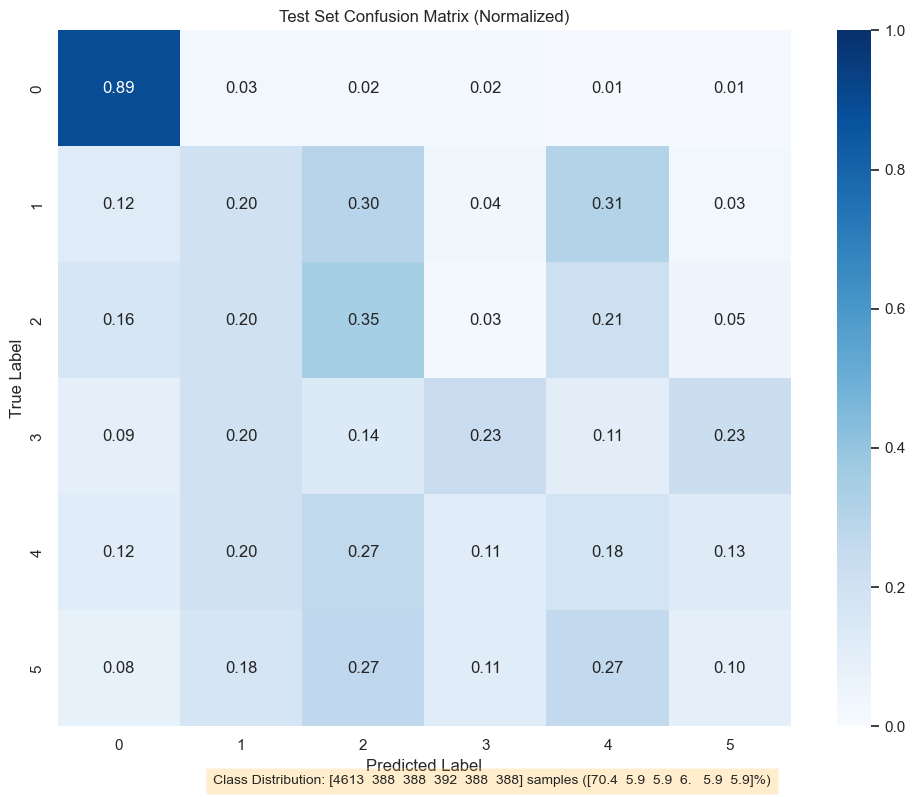

Class distribution: [4613  388  388  392  388  388]
Class percentages: [70.4  5.9  5.9  6.   5.9  5.9]%
Class 0 accuracy: 0.89
Class 1 accuracy: 0.20
Class 2 accuracy: 0.35
Class 3 accuracy: 0.23
Class 4 accuracy: 0.18
Class 5 accuracy: 0.10


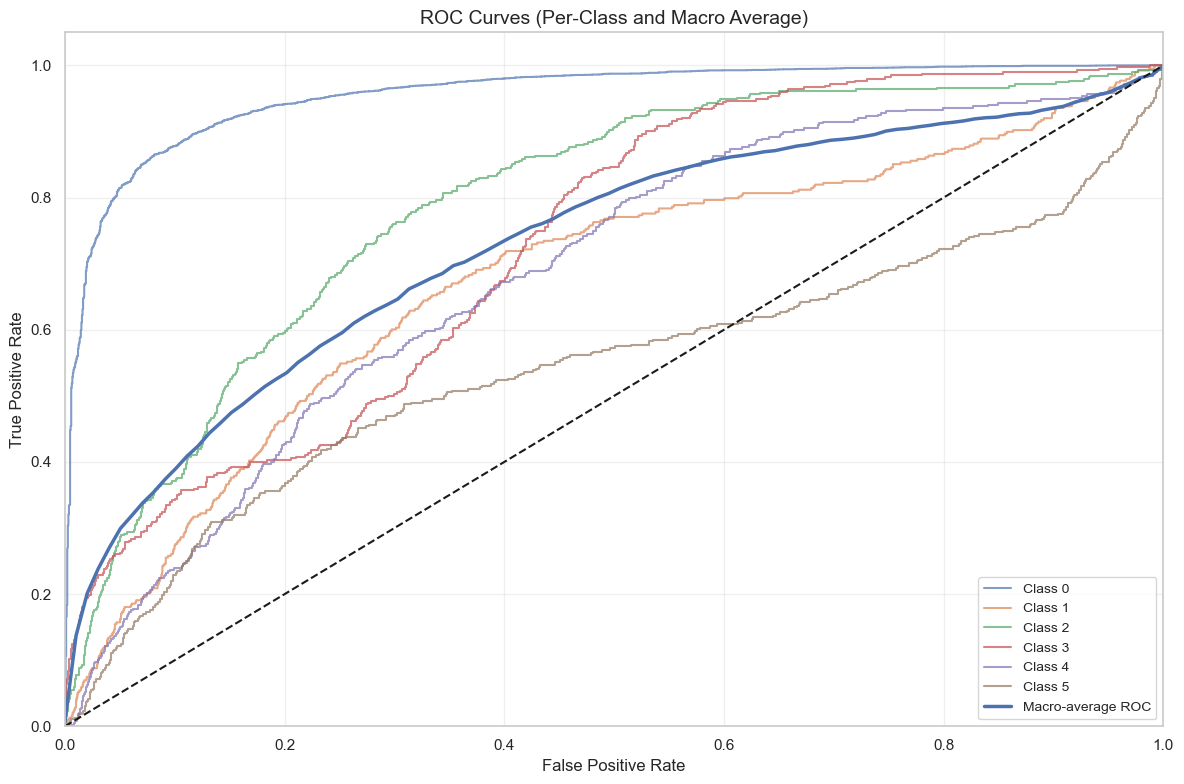

{'best_feature_set': ['Stiffness', 'Upstroke', 'Downstroke2', 'contact_area', 'peak_position', 'cubic_coefficient', 'local_mean_Downstroke2', 'local_gradient_norm_Stiffness', 'local_gradient_norm_Downstroke2', 'stiffness_deviation_from_global', 'stiffness_deviation_from_global_median', 'stiffness_z_score', 'local_Ra_w5', 'local_Ra_w7', 'local_Rq_w3', 'local_Rq_w5', 'local_Rq_w7', 'local_kurtosis_w7', 'local_peak_height_w3', 'local_peak_height_w5', 'local_valley_depth_w5', 'local_valley_depth_w7'], 'best_classifier_type': 'xgb', 'best_params': {'learning_rate': 0.16389182673681812, 'n_estimators': 211, 'max_depth': 10, 'subsample': 0.8338125373939526, 'colsample_bytree': 0.8772531868959561, 'min_child_weight': 5, 'gamma': 0.008996222075940974, 'reg_alpha': 1.6718738072849733, 'reg_lambda': 5.626302153441131}, 'best_binary_f1': 0.8405442841361683, 'test_metrics': {'precision_macro': np.float64(0.3141820993945514), 'recall_macro': np.float64(0.32439200474082286), 'f1_macro': np.float64(0.

In [43]:
# Create and train the best classifier
if best_classifier_type == 'rf':
    model = RandomForestClassifier(**best_params, random_state=42)
elif best_classifier_type == 'svc':
    model = SVC(**best_binary_params, probability=True, random_state=42)
elif best_classifier_type == 'xgb':
    model = xgb.XGBClassifier(**best_params, random_state=42)
elif best_classifier_type == 'logistic':
    model = LogisticRegression(**best_params, random_state=42)
else:  # 'gb'
    model = GradientBoostingClassifier(**best_params, random_state=42)

X_train_selected, X_test_selected = X_train[best_feature_set], X_test[best_feature_set]
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_selected, y_train)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_pred_test = model.predict(X_test_selected)
y_proba_test = model.predict_proba(X_test_selected)

test_metrics = calculate_metrics(y_test, y_pred_test, y_proba_test)

# Print final results
print("Test Set Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.4f}")

plot_confusion_matrix(y_test, y_pred_test, title='Test Set Confusion Matrix')

# Plot ROC curves
all_classes = np.unique(np.concatenate([y_train, y_test]))
plot_roc_curves(y_test, y_proba_test, all_classes)

# Return summary of results
summary = {
    'best_feature_set' : best_feature_set,
    'best_classifier_type' : best_classifier_type,
    'best_params' : best_params,
    'best_binary_f1' : best_f1,
    'test_metrics': test_metrics,
    'model': model
}

print(summary)

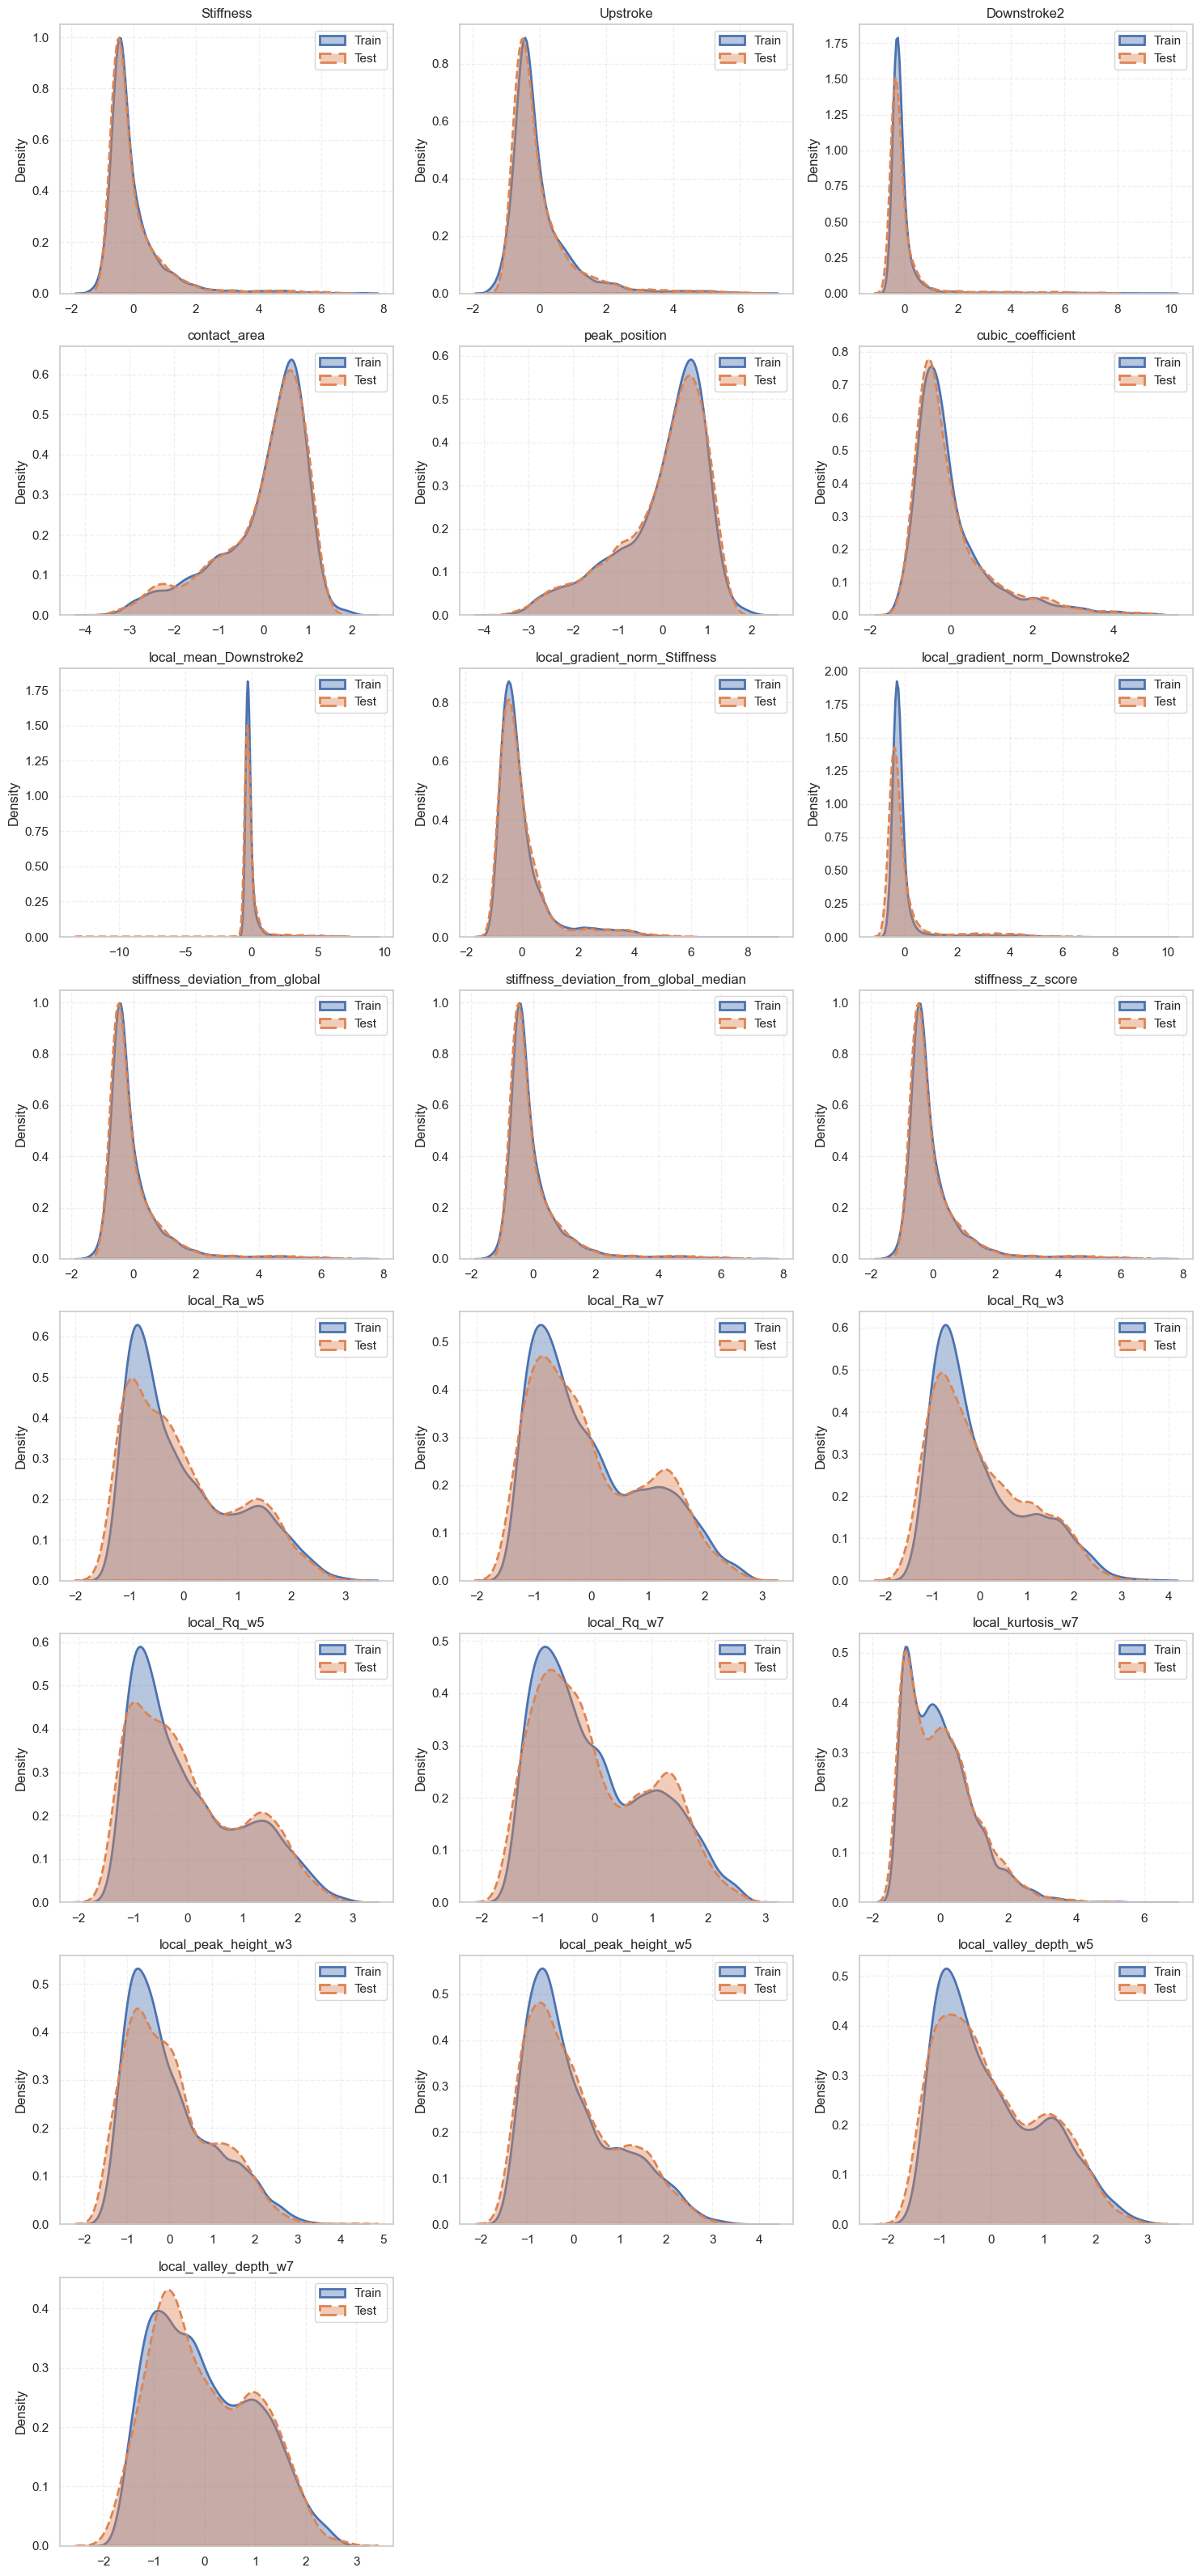

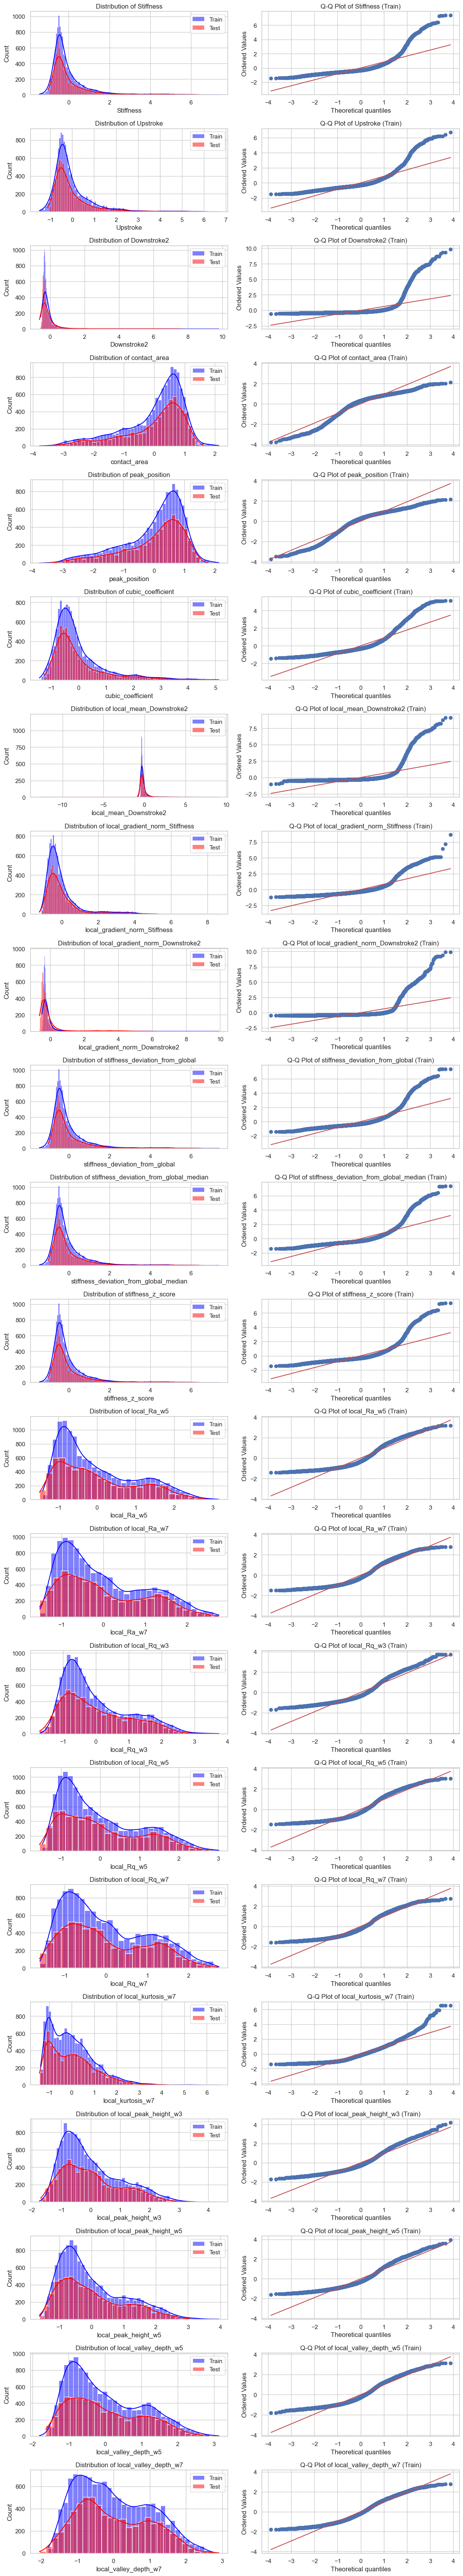

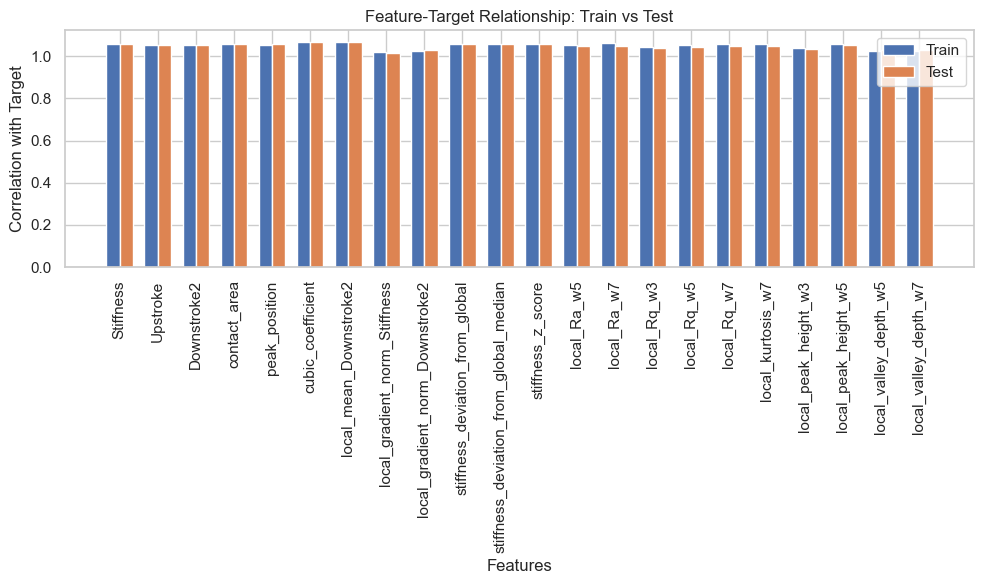

Consistency of feature-target relationships: 0.9375


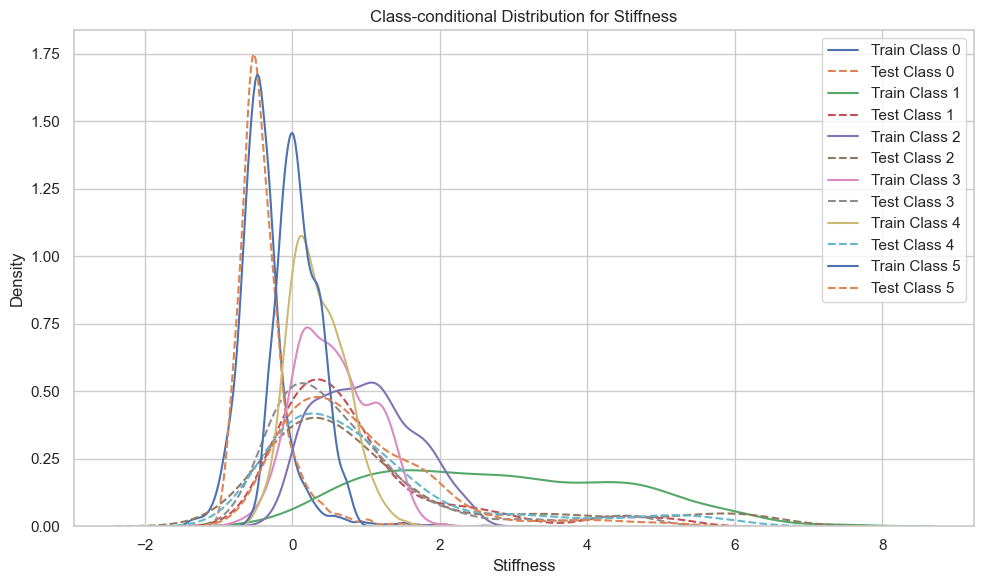

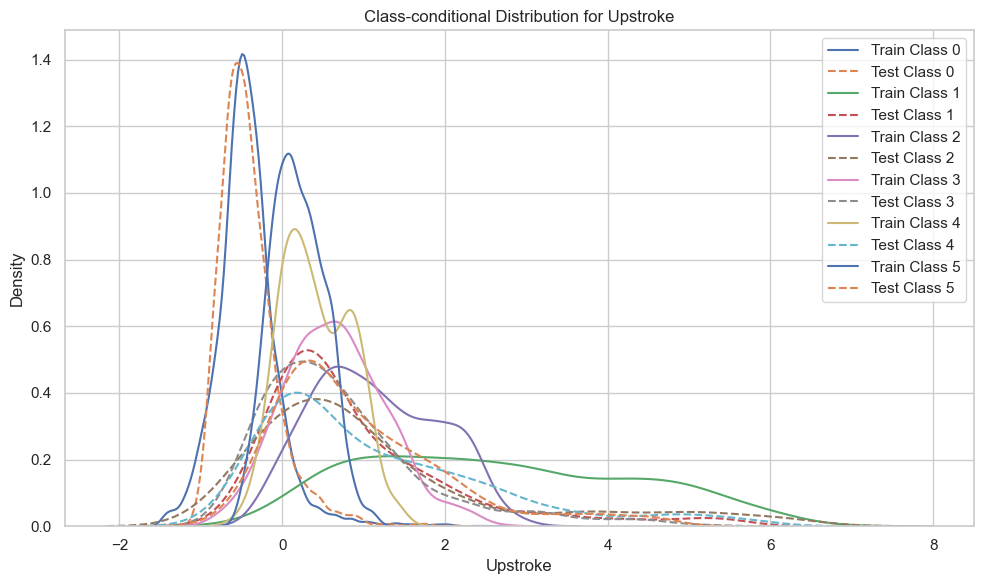

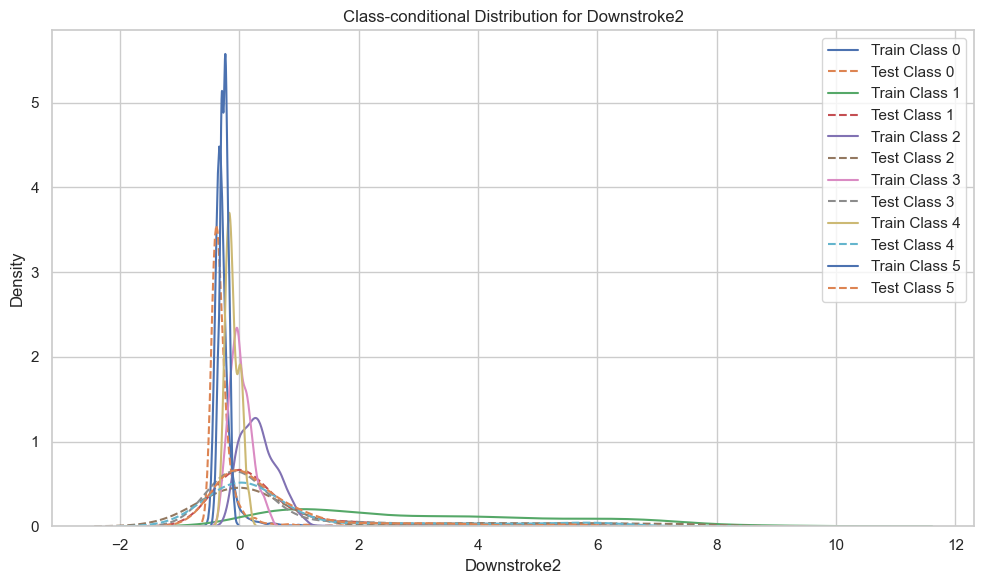

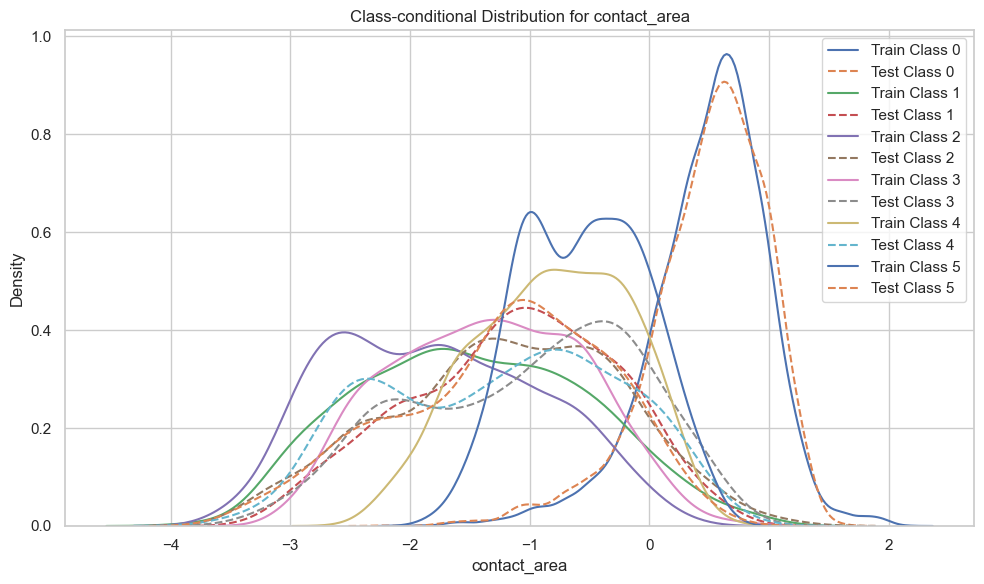

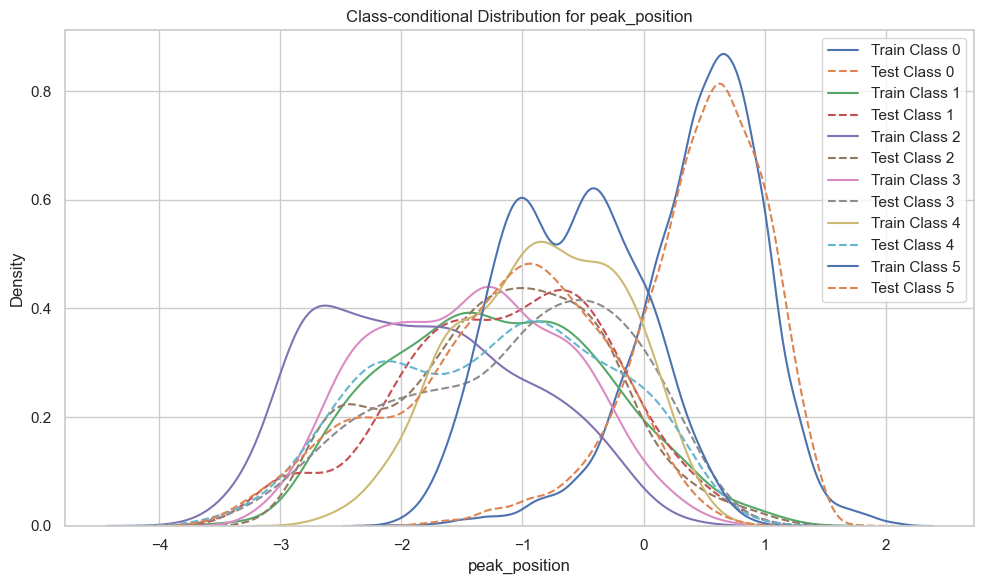

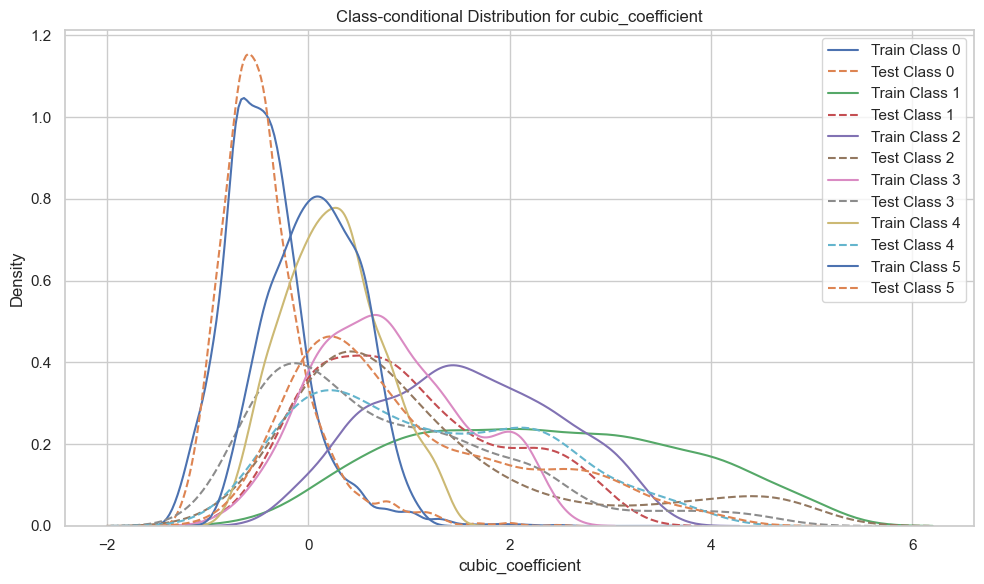

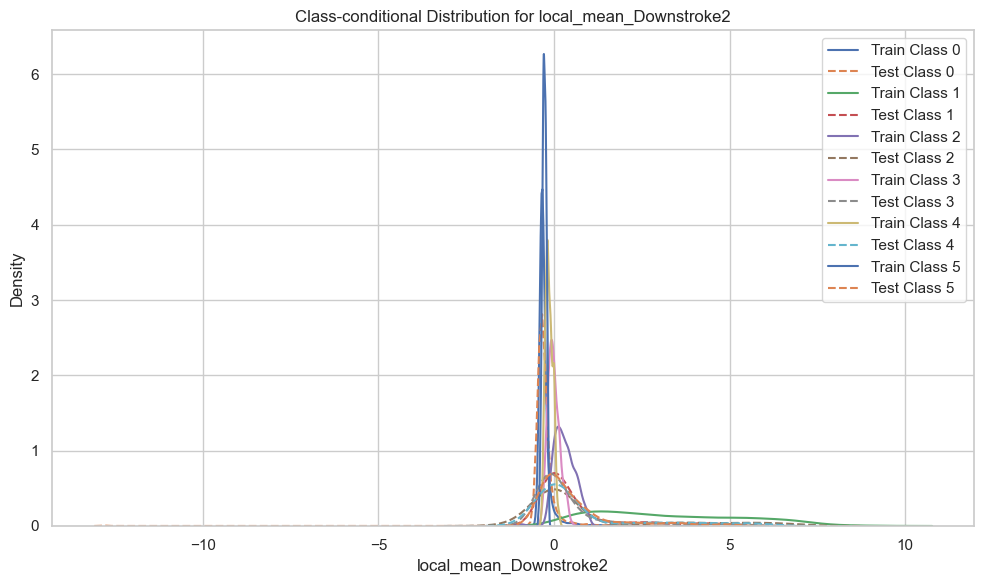

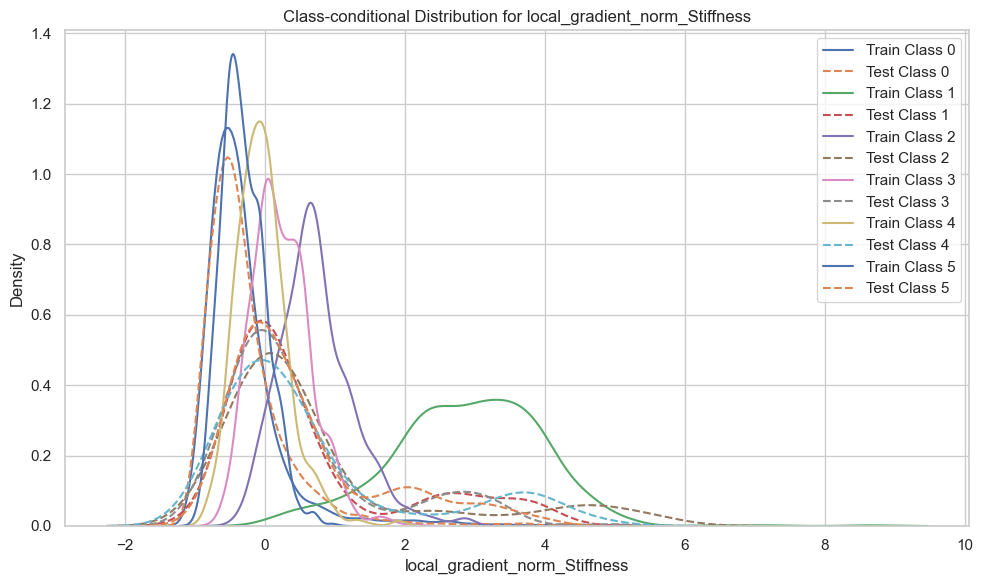

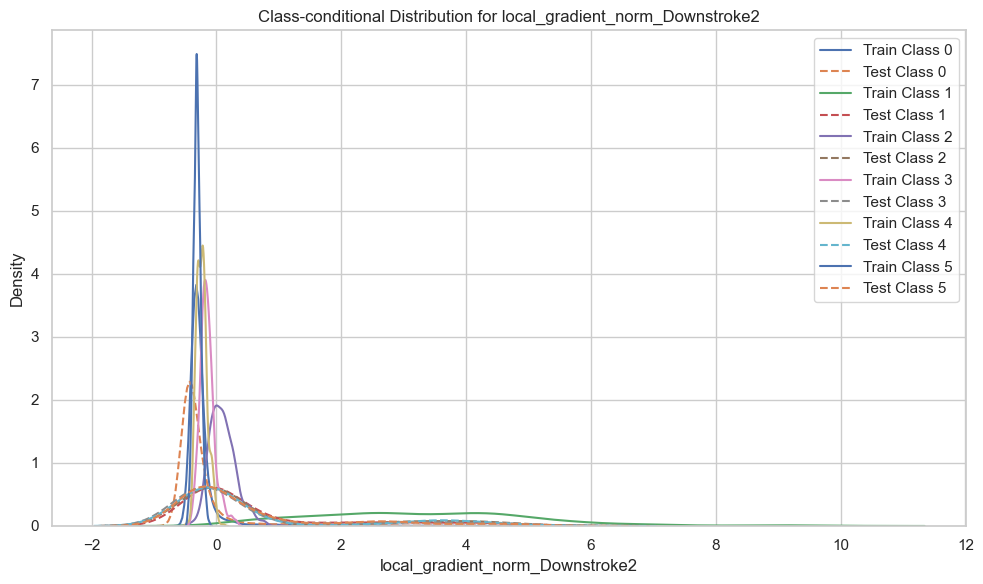

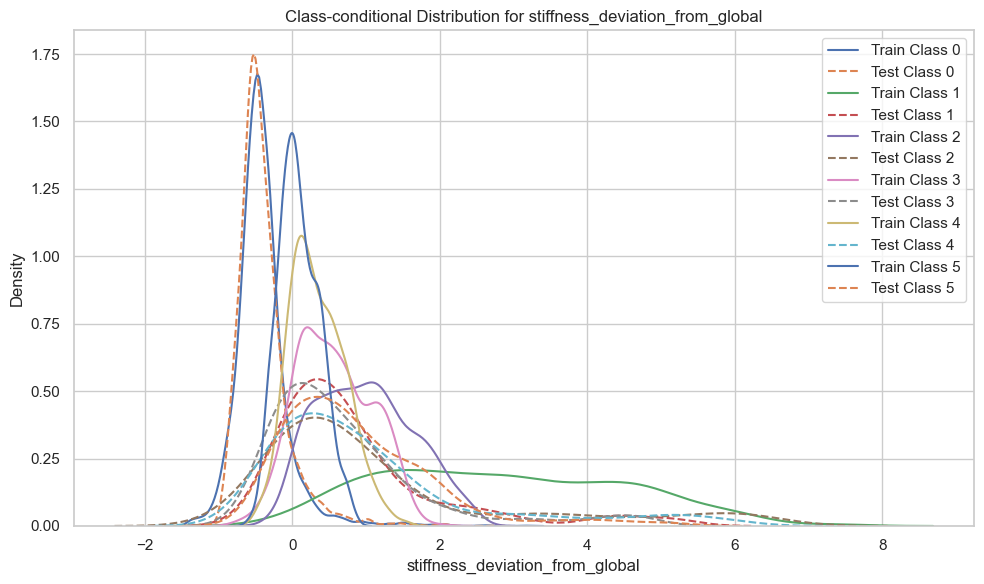

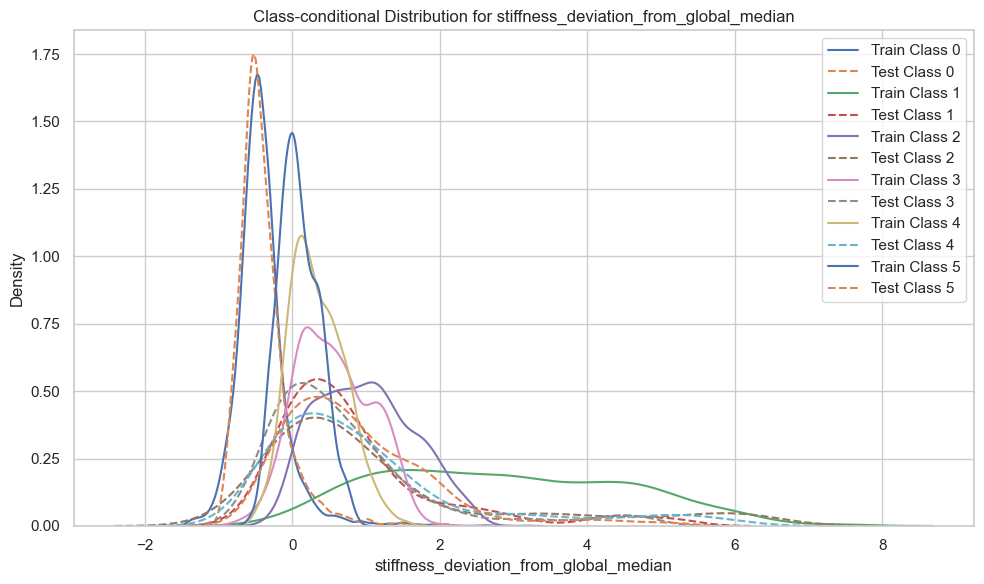

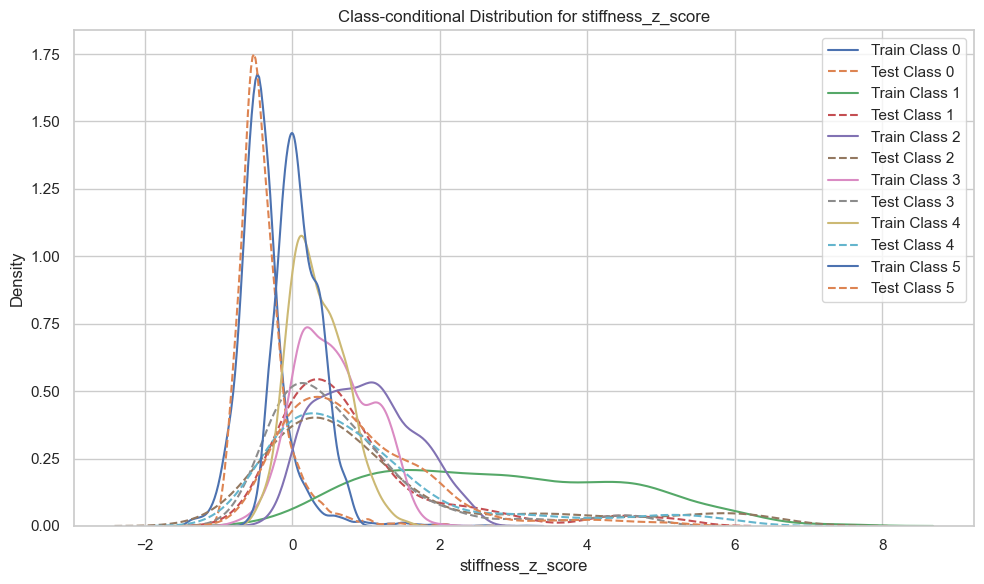

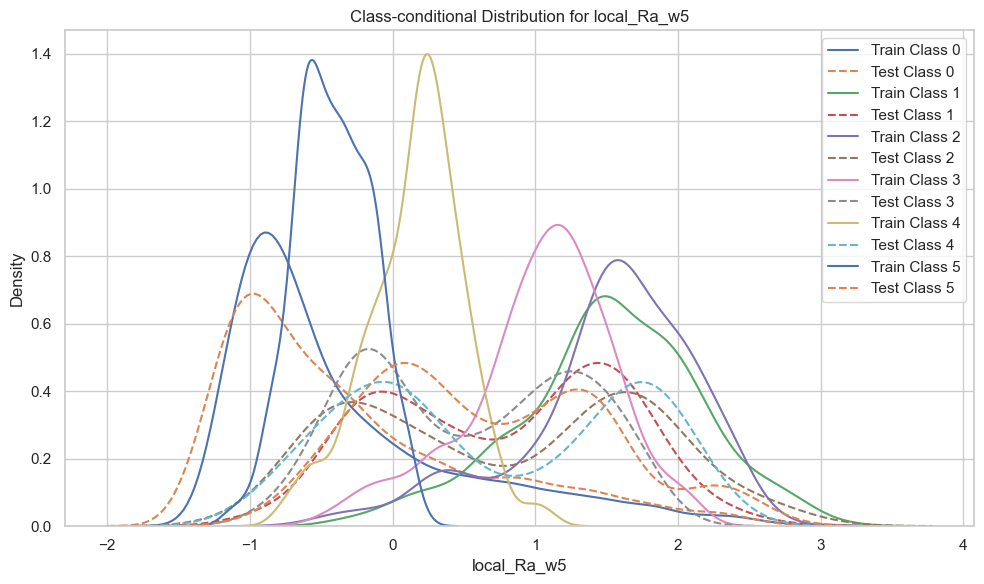

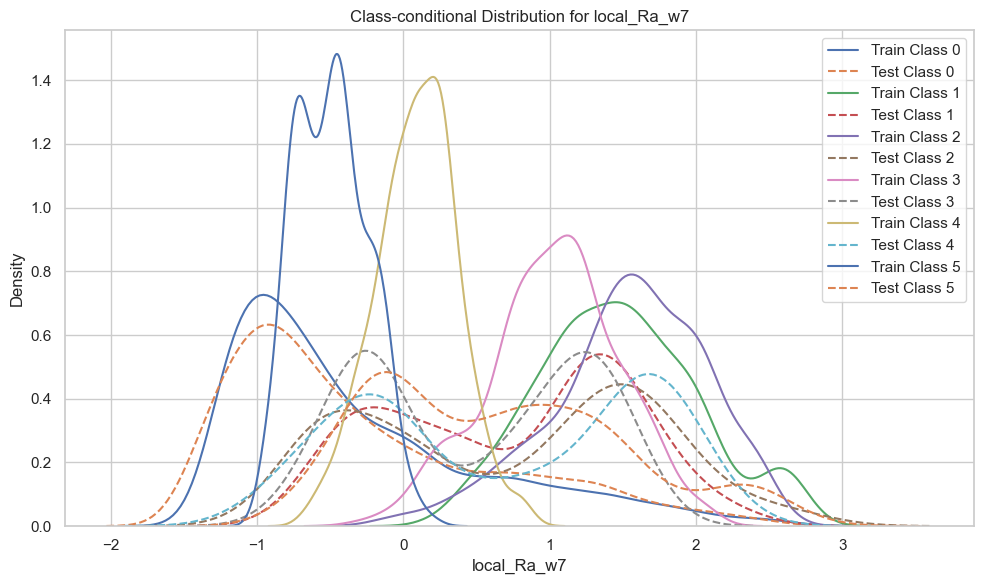

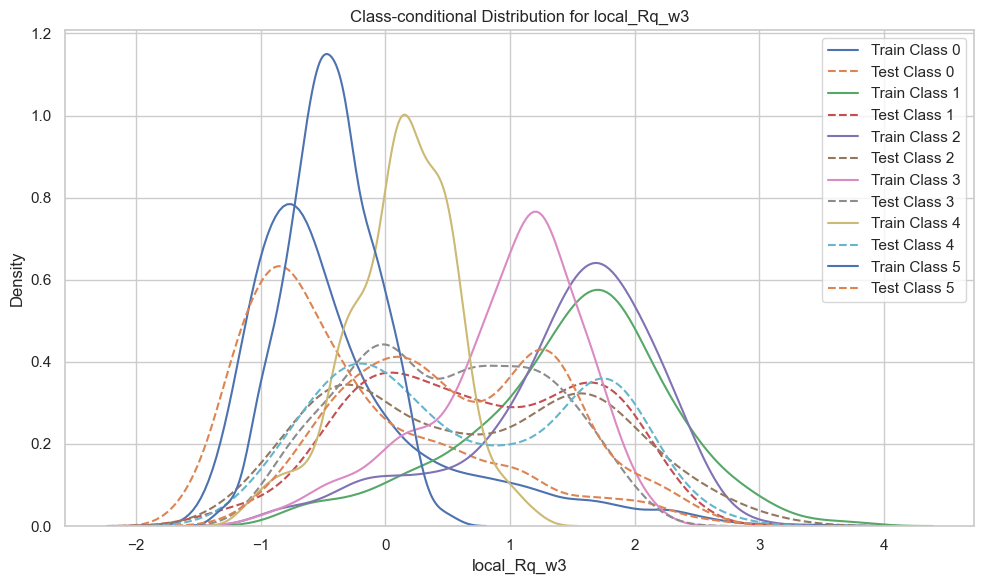

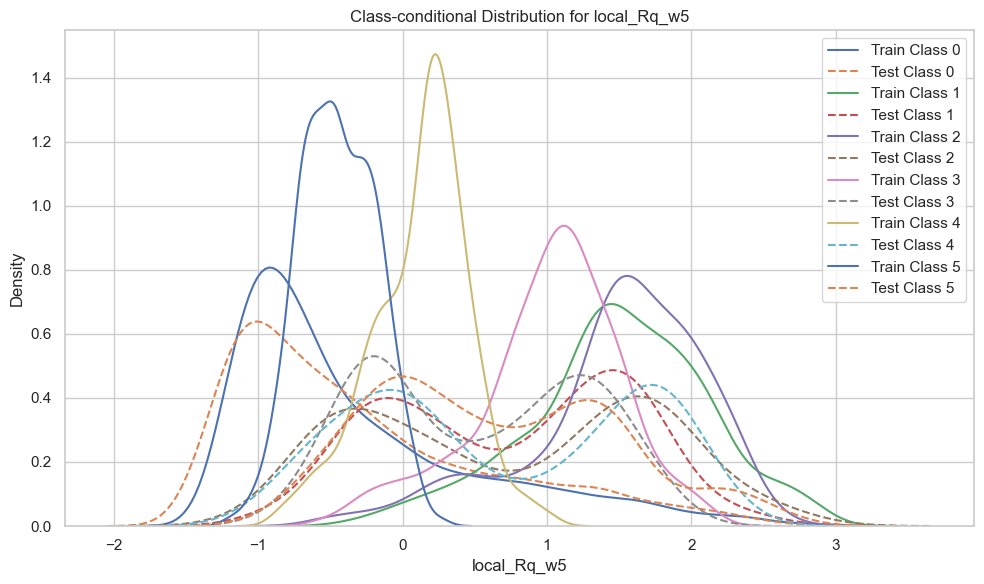

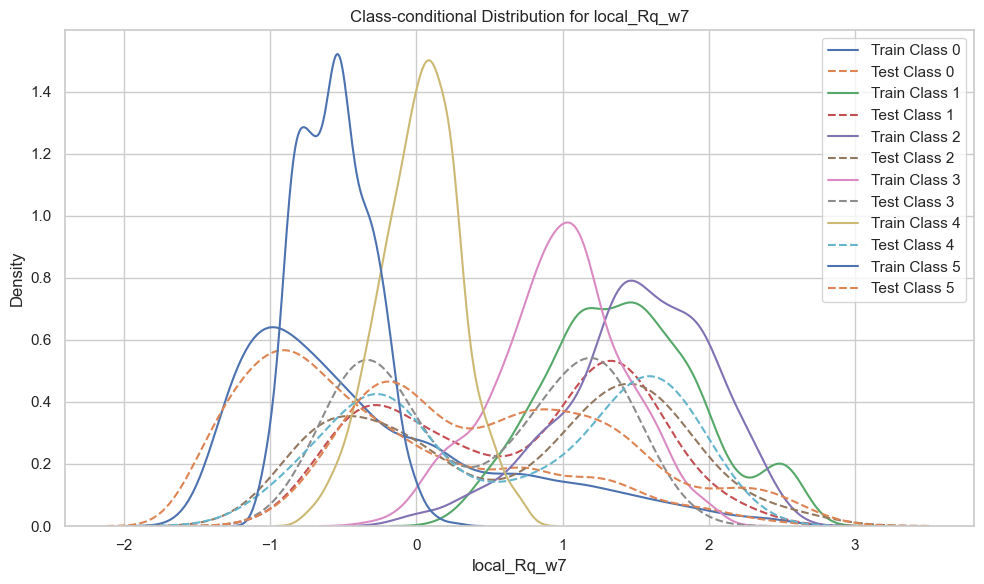

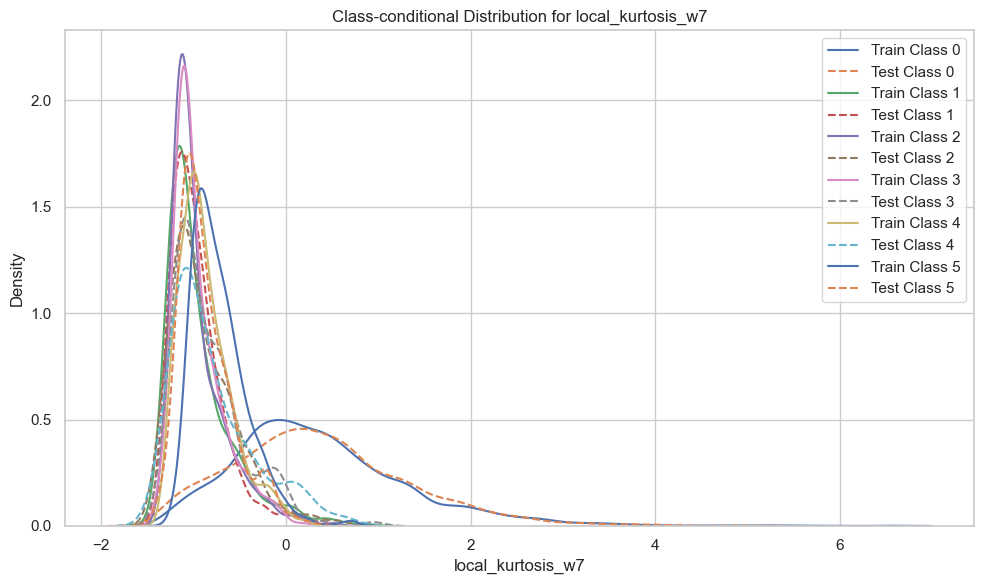

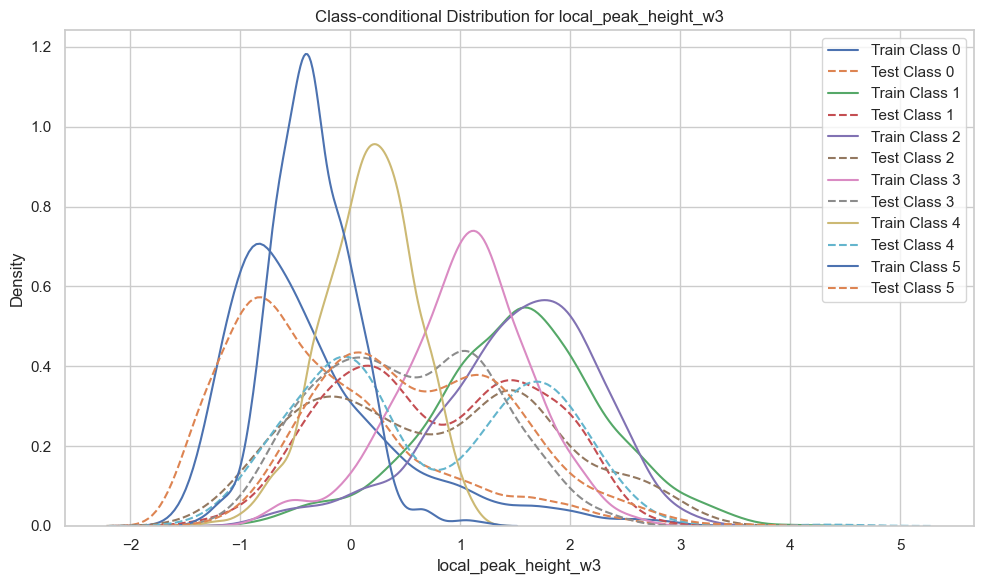

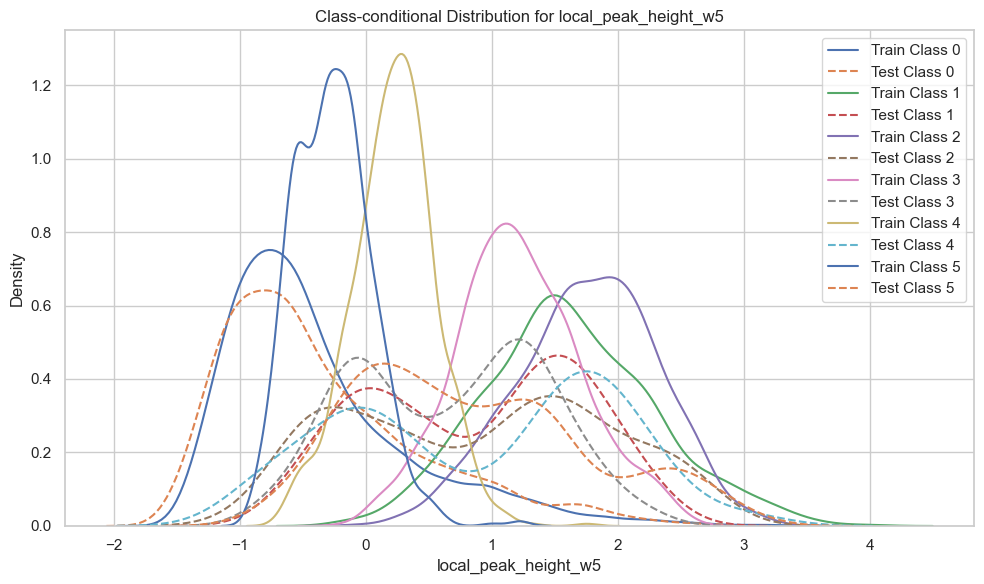

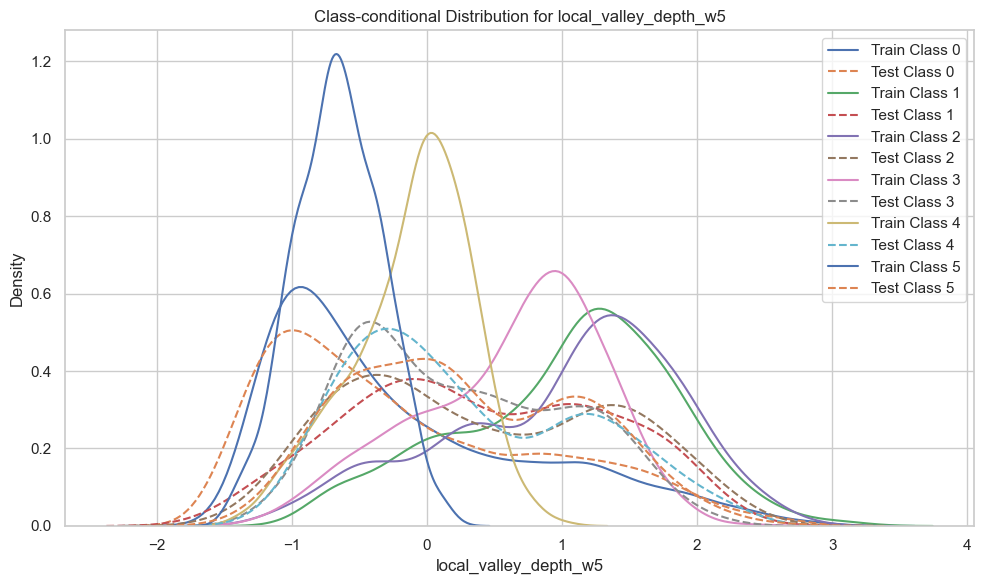

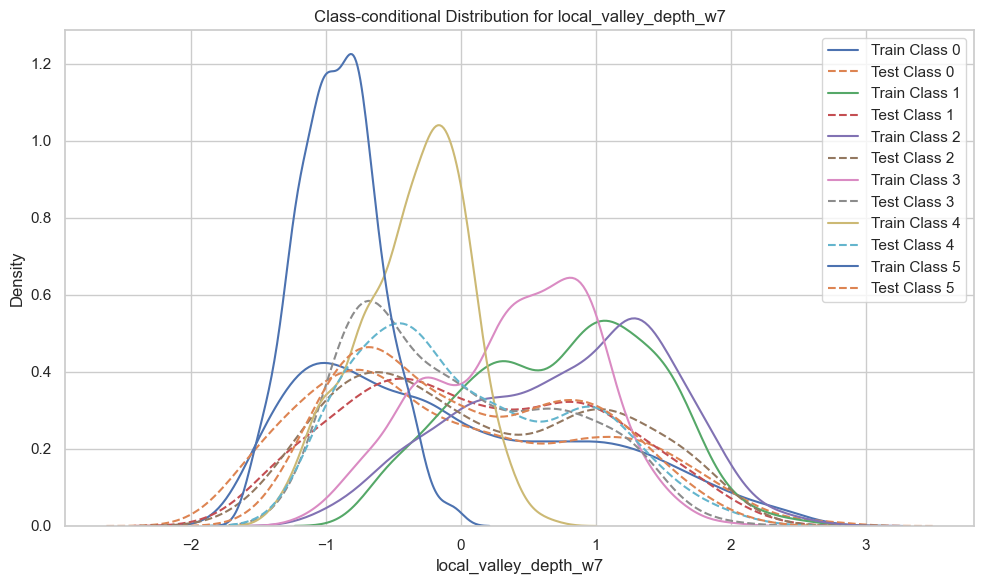

In [57]:
def compare_distributions(X_train, X_test, feature_set):
    num_features = len(feature_set)
    cols = 3
    rows = (num_features + cols - 1) // cols  # Ceiling division for rows

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, feature in enumerate(feature_set):
        plt.subplot(rows, cols, i + 1)
        sns.kdeplot(X_train[feature], label='Train', fill=True, alpha=0.4, linewidth=2)
        sns.kdeplot(X_test[feature], label='Test', fill=True, alpha=0.4, linewidth=2, linestyle='--')
        plt.title(feature, fontsize=12)
        plt.xlabel('')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

compare_distributions(X_train, X_test, best_feature_set)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.metrics import mutual_info_score
from scipy import stats

# 1. Compare Feature Distributions
def compare_feature_distributions(X_train, X_test, feature_names=None):
    """Compare the distributions of features in train and test sets."""
    if feature_names is None:
        feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

    fig, axes = plt.subplots(len(feature_names), 2, figsize=(12, 3*len(feature_names)))

    for i, feature in enumerate(feature_names):
        # Histogram comparison
        sns.histplot(X_train[:, i] if isinstance(X_train, np.ndarray) else X_train[feature],
                     kde=True, ax=axes[i, 0], color='blue', label='Train')
        sns.histplot(X_test[:, i] if isinstance(X_test, np.ndarray) else X_test[feature],
                     kde=True, ax=axes[i, 0], color='red', alpha=0.5, label='Test')
        axes[i, 0].set_title(f'Distribution of {feature}')
        axes[i, 0].legend()

        # QQ plot to check if distributions match
        stats.probplot(X_train[:, i] if isinstance(X_train, np.ndarray) else X_train[feature],
                      dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'Q-Q Plot of {feature} (Train)')

    plt.tight_layout()
    plt.show()

    # Kolmogorov-Smirnov test for distribution similarity
    ks_results = {}
    for i, feature in enumerate(feature_names):
        train_feat = X_train[:, i] if isinstance(X_train, np.ndarray) else X_train[feature]
        test_feat = X_test[:, i] if isinstance(X_test, np.ndarray) else X_test[feature]
        ks_stat, p_value = stats.ks_2samp(train_feat, test_feat)
        ks_results[feature] = {'KS Statistic': ks_stat, 'p-value': p_value}

    return pd.DataFrame(ks_results).T

# 2. Compare Feature-Class Relationships
def compare_feature_importance(X_train, y_train, X_test, y_test, feature_names=None):
    """Compare how features relate to target classes in train vs test sets."""
    if feature_names is None:
        feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

    # Method 1: Feature correlation with target
    train_correlations = []
    test_correlations = []

    for i, feature in enumerate(feature_names):
        train_feat = X_train[:, i] if isinstance(X_train, np.ndarray) else X_train[feature]
        test_feat = X_test[:, i] if isinstance(X_test, np.ndarray) else X_test[feature]

        # Point-biserial correlation for numerical features vs binary target
        if len(np.unique(y_train)) == 2:
            train_corr, _ = stats.pointbiserialr(train_feat, y_train)
            test_corr, _ = stats.pointbiserialr(test_feat, y_test)
        else:
            # For multi-class, use mutual information instead
            train_corr = mutual_info_score(train_feat, y_train)
            test_corr = mutual_info_score(test_feat, y_test)

        train_correlations.append(train_corr)
        test_correlations.append(test_corr)

    # Plot correlation comparison
    plt.figure(figsize=(10, 6))
    indices = np.arange(len(feature_names))
    width = 0.35

    plt.bar(indices - width/2, train_correlations, width, label='Train')
    plt.bar(indices + width/2, test_correlations, width, label='Test')

    plt.xlabel('Features')
    plt.ylabel('Correlation with Target')
    plt.title('Feature-Target Relationship: Train vs Test')
    plt.xticks(indices, feature_names, rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Calculate correlation between train and test correlations
    correlation_consistency = np.corrcoef(train_correlations, test_correlations)[0, 1]
    print(f"Consistency of feature-target relationships: {correlation_consistency:.4f}")

    return pd.DataFrame({
        'Feature': feature_names,
        'Train Correlation': train_correlations,
        'Test Correlation': test_correlations,
        'Absolute Difference': np.abs(np.array(train_correlations) - np.array(test_correlations))
    }).sort_values('Absolute Difference')

# 3. Class-conditional Feature Analysis
def analyze_class_conditional_features(X_train, y_train, X_test, y_test, feature_names=None):
    """Analyze feature distributions conditioned on class labels."""
    if feature_names is None:
        feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

    # Get unique classes
    classes = np.unique(np.concatenate([y_train, y_test]))

    # For each feature, compare class-conditional distributions
    results = {}

    for i, feature in enumerate(feature_names):
        train_feat = X_train[:, i] if isinstance(X_train, np.ndarray) else X_train[feature]
        test_feat = X_test[:, i] if isinstance(X_test, np.ndarray) else X_test[feature]

        # Plot class-conditional distributions
        plt.figure(figsize=(10, 6))

        for cls in classes:
            # Train data for this class
            train_cls_data = train_feat[y_train == cls]
            # Test data for this class
            test_cls_data = test_feat[y_test == cls]

            sns.kdeplot(train_cls_data, label=f'Train Class {cls}')
            sns.kdeplot(test_cls_data, label=f'Test Class {cls}', linestyle='--')

            # KS test between train and test for this class
            ks_stat, p_value = stats.ks_2samp(train_cls_data, test_cls_data)
            results.setdefault(feature, {})[f'Class {cls} KS p-value'] = p_value

        plt.title(f'Class-conditional Distribution for {feature}')
        plt.legend()
        plt.tight_layout()
        plt.show()

    return pd.DataFrame.from_dict(results, orient='index')


#Check consistency
dist_comparison = compare_feature_distributions(X_train[best_feature_set], X_test[best_feature_set], best_feature_set)
importance_comparison = compare_feature_importance(X_train[best_feature_set], y_train,
                                                  X_test[best_feature_set], y_test,
                                                 best_feature_set)
class_analysis = analyze_class_conditional_features(X_train[best_feature_set], y_train,
                                                   X_test[best_feature_set], y_test,
                                                   best_feature_set)


In [58]:
importance_comparison

Feature  Train Correlation  \
1                                 Upstroke           1.051611   
3                             contact_area           1.060356   
6                   local_mean_Downstroke2           1.067043   
9          stiffness_deviation_from_global           1.058640   
10  stiffness_deviation_from_global_median           1.058640   
11                       stiffness_z_score           1.058640   
0                                Stiffness           1.058640   
5                        cubic_coefficient           1.068975   
7            local_gradient_norm_Stiffness           1.019155   
2                              Downstroke2           1.051344   
14                             local_Rq_w3           1.041562   
4                            peak_position           1.055588   
20                   local_valley_depth_w5           1.026672   
18                    local_peak_height_w3           1.039742   
21                   local_valley_depth_w7           1.024637   
8          local_gradient_norm_Downstroke2           1.023365   
19                    local_peak_height_w5           1.060177   
17                       local_kurtosis_w7           1.057574   
12                             local_Ra_w5           1.055088   
15                             local_Rq_w5           1.054053   
16                             local_Rq_w7           1.056880   
13                             local_Ra_w7           1.060860   

    Test Correlation  Absolute Difference  
1           1.051743             0.000132  
3           1.060025             0.000331  
6           1.067452             0.000409  
9           1.058041             0.000599  
10          1.058041             0.000599  
11          1.058041             0.000599  
0           1.057749             0.000891  
5           1.066950             0.002025  
7           1.017056             0.002099  
2           1.053555             0.002211  
14          1.039261             0.002300  
4           1.058332             0.002744  
20          1.030522             0.003850  
18          1.035597             0.004145  
21          1.028895             0.004258  
8           1.027954             0.004589  
19          1.053202             0.006975  
17          1.049785             0.007789  
12          1.047241             0.007847  
15          1.044080             0.009973  
16          1.046572             0.010308  
13          1.046987             0.013873

In [59]:
dist_comparison

KS Statistic        p-value
Stiffness                                   0.030166   6.855078e-04
Upstroke                                    0.035970   2.377723e-05
Downstroke2                                 0.167358  1.670678e-107
contact_area                                0.016926   1.614173e-01
peak_position                               0.022478   2.375351e-02
cubic_coefficient                           0.035542   3.108085e-05
local_mean_Downstroke2                      0.083471   6.009026e-27
local_gradient_norm_Stiffness               0.022117   2.735157e-02
local_gradient_norm_Downstroke2             0.314422   0.000000e+00
stiffness_deviation_from_global             0.030166   6.855078e-04
stiffness_deviation_from_global_median      0.030166   6.855078e-04
stiffness_z_score                           0.030166   6.855078e-04
local_Ra_w5                                 0.045625   2.396645e-08
local_Ra_w7                                 0.030051   7.285830e-04
local_Rq_w3                                 0.043109   1.694018e-07
local_Rq_w5                                 0.041823   4.408380e-07
local_Rq_w7                                 0.027152   3.113205e-03
local_kurtosis_w7                           0.024306   1.122758e-02
local_peak_height_w3                        0.038601   4.264719e-06
local_peak_height_w5                        0.028784   1.399483e-03
local_valley_depth_w5                       0.032120   2.361659e-04
local_valley_depth_w7                       0.024021   1.267087e-02

In [60]:
class_analysis

Class 0 KS p-value  \
Stiffness                                     6.256260e-05   
Upstroke                                      1.901068e-07   
Downstroke2                                  2.348548e-143   
contact_area                                  5.660760e-02   
peak_position                                 3.100516e-03   
cubic_coefficient                             4.166851e-07   
local_mean_Downstroke2                        3.001923e-36   
local_gradient_norm_Stiffness                 2.414199e-06   
local_gradient_norm_Downstroke2              9.243968e-321   
stiffness_deviation_from_global               6.256260e-05   
stiffness_deviation_from_global_median        6.256260e-05   
stiffness_z_score                             6.256260e-05   
local_Ra_w5                                   8.159615e-12   
local_Ra_w7                                   2.602072e-05   
local_Rq_w3                                   6.729941e-10   
local_Rq_w5                                   4.537575e-10   
local_Rq_w7                                   2.043029e-04   
local_kurtosis_w7                             2.421727e-04   
local_peak_height_w3                          5.093733e-09   
local_peak_height_w5                          1.110632e-05   
local_valley_depth_w5                         3.259994e-06   
local_valley_depth_w7                         3.557039e-02   

                                        Class 1 KS p-value  \
Stiffness                                     2.797980e-92   
Upstroke                                      2.086394e-58   
Downstroke2                                  1.719993e-100   
contact_area                                  3.293266e-09   
peak_position                                 1.126838e-01   
cubic_coefficient                             1.284241e-43   
local_mean_Downstroke2                       6.681826e-117   
local_gradient_norm_Stiffness                2.694462e-140   
local_gradient_norm_Downstroke2              1.946565e-129   
stiffness_deviation_from_global               2.797980e-92   
stiffness_deviation_from_global_median        2.797980e-92   
stiffness_z_score                             2.797980e-92   
local_Ra_w5                                   1.761184e-31   
local_Ra_w7                                   3.115216e-38   
local_Rq_w3                                   2.188718e-30   
local_Rq_w5                                   7.106715e-32   
local_Rq_w7                                   1.181113e-39   
local_kurtosis_w7                             3.123316e-02   
local_peak_height_w3                          1.500133e-31   
local_peak_height_w5                          2.651319e-32   
local_valley_depth_w5                         1.282369e-23   
local_valley_depth_w7                         1.236071e-25   

                                        Class 2 KS p-value  \
Stiffness                                     3.944555e-13   
Upstroke                                      2.245695e-11   
Downstroke2                                   1.331242e-24   
contact_area                                  9.365818e-20   
peak_position                                 6.656876e-28   
cubic_coefficient                             1.413294e-25   
local_mean_Downstroke2                        2.080785e-24   
local_gradient_norm_Stiffness                 2.593001e-33   
local_gradient_norm_Downstroke2               8.537546e-20   
stiffness_deviation_from_global               3.944555e-13   
stiffness_deviation_from_global_median        3.944555e-13   
stiffness_z_score                             3.944555e-13   
local_Ra_w5                                   9.118900e-32   
local_Ra_w7                                   4.622690e-39   
local_Rq_w3                                   6.784183e-30   
local_Rq_w5                                   3.555419e-32   
local_Rq_w7                                   8.243336e-39   
local_kurtosis_w7                             1.960515e-04   
local_pe

In [63]:
# Example of feature consistency analysis and interpretation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import mutual_info_score
from scipy import stats

# Let's say we've already run the analyses and want to interpret the results

# 1. Example of interpreting distribution comparison results
def interpret_distribution_results(ks_results):
    """
    Interpret the Kolmogorov-Smirnov test results.
    p-value > 0.05 suggests distributions are similar.
    """
    print("Feature Distribution Stability:")
    print("-" * 50)

    stable_features = []
    unstable_features = []

    for feature, row in ks_results.iterrows():
        if row['p-value'] > 0.05:
            stable_features.append((feature, row['p-value']))
        else:
            unstable_features.append((feature, row['p-value']))

    print("Stable features (similar distributions in train & test):")
    for feature, p_value in sorted(stable_features, key=lambda x: x[1], reverse=True):
        print(f"  - {feature}: p-value = {p_value:.4f}")

    print("\nUnstable features (different distributions in train & test):")
    for feature, p_value in sorted(unstable_features, key=lambda x: x[1]):
        print(f"  - {feature}: p-value = {p_value:.4f}")

    print("\nConclusion:")
    if len(stable_features) > len(unstable_features):
        print("Most features have stable distributions, suggesting minimal dataset shift.")
    else:
        print("Many features show different distributions, indicating possible dataset shift.")
        print("WARNING: Models trained on features with different distributions may not generalize well!")

    return stable_features, unstable_features

# 2. Example of interpreting feature-class relationship results
def interpret_feature_importance_results(importance_df, threshold=0.05):
    """
    Interpret feature importance consistency between train and test sets.
    A feature is consistently important if it ranks highly in both sets.
    """
    print("\nFeature-Class Relationship Consistency:")
    print("-" * 50)

    # Calculate the rank correlation between train and test importance
    rank_correlation = np.corrcoef(
        importance_df['Train Correlation'].rank(),
        importance_df['Test Correlation'].rank()
    )[0, 1]

    print(f"Overall rank correlation between train and test importance: {rank_correlation:.4f}")

    if rank_correlation > 0.7:
        print("Strong correlation: Features tend to maintain their relative importance across datasets.")
    elif rank_correlation > 0.4:
        print("Moderate correlation: Some variability in feature importance between datasets.")
    else:
        print("Weak correlation: Feature importance is inconsistent between datasets.")

    # Calculate relative difference
    importance_df['Relative Difference'] = np.abs(importance_df['Train Correlation'] - importance_df['Test Correlation']) / (
        (importance_df['Train Correlation'] + importance_df['Test Correlation']) / 2 + 1e-10)

    # Identify consistent vs inconsistent features
    consistent_features = importance_df[importance_df['Relative Difference'] < threshold].sort_values('Train Correlation', ascending=False)
    inconsistent_features = importance_df[importance_df['Relative Difference'] >= threshold].sort_values('Relative Difference', ascending=False)

    print(f"\nConsistently important features (appear important in both train & test):")
    if not consistent_features.empty:
        for i, row in consistent_features.head(5).iterrows():
            print(f"  - {row['Feature']}: Train={row['Train Correlation']:.4f}, Test={row['Test Correlation']:.4f}")
    else:
        print("  None found")

    print(f"\nInconsistently important features (importance differs between train & test):")
    if not inconsistent_features.empty:
        for i, row in inconsistent_features.head(5).iterrows():
            print(f"  - {row['Feature']}: Train={row['Train Correlation']:.4f}, Test={row['Test Correlation']:.4f}")
    else:
        print("  None found")

    print("\nConclusion:")
    if len(consistent_features) > len(inconsistent_features):
        print("Most features show consistent importance, suggesting good generalization potential.")
    else:
        print("Many features show inconsistent importance, suggesting possible overfitting or dataset shift.")

    return consistent_features, inconsistent_features

# 3. Example of interpreting class-conditional feature analysis
def interpret_class_conditional_results(class_results, p_value_threshold=0.05):
    """
    Interpret the class-conditional feature distribution results.
    """
    print("\nClass-Conditional Feature Stability:")
    print("-" * 50)

    stable_by_class = {}
    unstable_by_class = {}

    for feature, row in class_results.iterrows():
        for col in row.index:
            if 'KS p-value' in col:
                class_label = col.split(' KS')[0]
                p_value = row[col]

                if p_value > p_value_threshold:
                    stable_by_class.setdefault(class_label, []).append((feature, p_value))
                else:
                    unstable_by_class.setdefault(class_label, []).append((feature, p_value))

    for class_label in sorted(stable_by_class.keys()):
        print(f"\n{class_label} - Stable features:")
        for feature, p_value in sorted(stable_by_class[class_label], key=lambda x: x[1], reverse=True)[:5]:
            print(f"  - {feature}: p-value = {p_value:.4f}")

    for class_label in sorted(unstable_by_class.keys()):
        print(f"\n{class_label} - Unstable features:")
        for feature, p_value in sorted(unstable_by_class[class_label], key=lambda x: x[1])[:5]:
            print(f"  - {feature}: p-value = {p_value:.4f}")

    # Find features that are stable across all classes
    all_classes = set(stable_by_class.keys()).union(set(unstable_by_class.keys()))
    all_features = set()
    for features in stable_by_class.values():
        all_features.update([f[0] for f in features])

    universally_stable = []
    for feature in all_features:
        stable_for_all_classes = True
        for class_label in all_classes:
            stable_class_features = [f[0] for f in stable_by_class.get(class_label, [])]
            if feature not in stable_class_features:
                stable_for_all_classes = False
                break
        if stable_for_all_classes:
            universally_stable.append(feature)

    print(f"\nFeatures stable across ALL classes:")
    for feature in universally_stable:
        print(f"  - {feature}")

    print("\nConclusion:")
    if universally_stable:
        print(f"Found {len(universally_stable)} features that are reliable indicators across all classes.")
        print("These features are most likely to generalize well as predictors.")
    else:
        print("No features are consistently stable across all classes.")
        print("Consider class-specific feature sets or more robust modeling approaches.")

    return universally_stable, stable_by_class, unstable_by_class

# 4. Combine all analyses for overall interpretation
def identify_reliable_features(distribution_results, importance_results, class_results,
                              p_value_threshold=0.05, importance_threshold=0.05):
    """
    Combine all analyses to identify the most reliable features.
    """
    # Get stable features from distribution analysis
    stable_dist, _ = interpret_distribution_results(distribution_results)
    stable_dist_features = [f[0] for f in stable_dist]

    # Get consistent features from importance analysis
    consistent_features, _ = interpret_feature_importance_results(
        importance_results, threshold=importance_threshold
    )
    consistent_imp_features = consistent_features['Feature'].tolist()

    # Get universally stable features from class-conditional analysis
    universally_stable, _, _ = interpret_class_conditional_results(
        class_results, p_value_threshold=p_value_threshold
    )

    # Find features that pass all three tests
    reliable_features = set(stable_dist_features).intersection(
        set(consistent_imp_features)).intersection(set(universally_stable))

    print("\n" + "="*50)
    print("OVERALL CONCLUSION")
    print("="*50)
    print(f"Found {len(reliable_features)} highly reliable features that pass all tests:")
    for feature in reliable_features:
        print(f"  - {feature}")

    print("\nThese features:")
    print("1. Have similar distributions in train and test sets")
    print("2. Show consistent importance for prediction in both datasets")
    print("3. Maintain their class-conditional behavior across datasets")
    print("\nRECOMMENDATION: Consider focusing on these features for your final model")

    # Also identify features that pass 2 out of 3 tests
    partially_reliable = set()
    partially_reliable.update(
        set(stable_dist_features).intersection(set(consistent_imp_features)))
    partially_reliable.update(
        set(stable_dist_features).intersection(set(universally_stable)))
    partially_reliable.update(
        set(consistent_imp_features).intersection(set(universally_stable)))
    partially_reliable = partially_reliable - reliable_features

    print(f"\nAdditionally found {len(partially_reliable)} partially reliable features (passing 2/3 tests):")
    for feature in partially_reliable:
        print(f"  - {feature}")

    return reliable_features, partially_reliable

stable_features, unstable_features = interpret_distribution_results(dist_comparison)
consistent_features, inconsistent_features = interpret_feature_importance_results(importance_comparison)
universally_stable, stable_by_class, unstable_by_class = interpret_class_conditional_results(class_analysis)
reliable_features, partially_reliable = identify_reliable_features(dist_comparison, importance_comparison, class_analysis)


Feature Distribution Stability:
--------------------------------------------------
Stable features (similar distributions in train & test):
  - contact_area: p-value = 0.1614

Unstable features (different distributions in train & test):
  - local_gradient_norm_Downstroke2: p-value = 0.0000
  - Downstroke2: p-value = 0.0000
  - local_mean_Downstroke2: p-value = 0.0000
  - local_Ra_w5: p-value = 0.0000
  - local_Rq_w3: p-value = 0.0000
  - local_Rq_w5: p-value = 0.0000
  - local_peak_height_w3: p-value = 0.0000
  - Upstroke: p-value = 0.0000
  - cubic_coefficient: p-value = 0.0000
  - local_valley_depth_w5: p-value = 0.0002
  - Stiffness: p-value = 0.0007
  - stiffness_deviation_from_global: p-value = 0.0007
  - stiffness_deviation_from_global_median: p-value = 0.0007
  - stiffness_z_score: p-value = 0.0007
  - local_Ra_w7: p-value = 0.0007
  - local_peak_height_w5: p-value = 0.0014
  - local_Rq_w7: p-value = 0.0031
  - local_kurtosis_w7: p-value = 0.0112
  - local_valley_depth_w7: p-val

Test Set Metrics:
precision_macro: 0.3167
recall_macro: 0.3379
f1_macro: 0.3231
precision_class_0: 0.9663
recall_class_0: 0.8708
f1_class_0: 0.9161
precision_class_1: 0.1505
recall_class_1: 0.1959
f1_class_1: 0.1702
precision_class_2: 0.2142
recall_class_2: 0.3505
f1_class_2: 0.2659
precision_class_3: 0.2694
recall_class_3: 0.2832
f1_class_3: 0.2761
precision_class_4: 0.1494
recall_class_4: 0.1933
f1_class_4: 0.1685
precision_class_5: 0.1503
recall_class_5: 0.1340
f1_class_5: 0.1417
auc_macro: 0.6363
auc_class_0: 0.9649
auc_class_1: 0.6848
auc_class_2: 0.5945
auc_class_3: 0.5898
auc_class_4: 0.5312
auc_class_5: 0.4526


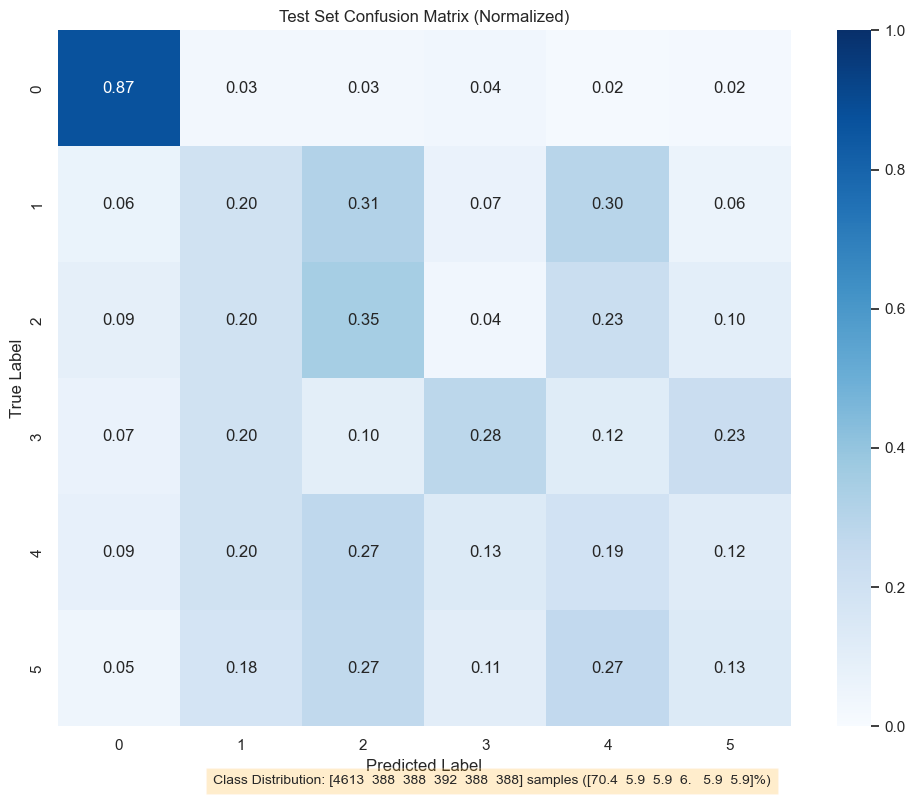

Class distribution: [4613  388  388  392  388  388]
Class percentages: [70.4  5.9  5.9  6.   5.9  5.9]%
Class 0 accuracy: 0.87
Class 1 accuracy: 0.20
Class 2 accuracy: 0.35
Class 3 accuracy: 0.28
Class 4 accuracy: 0.19
Class 5 accuracy: 0.13


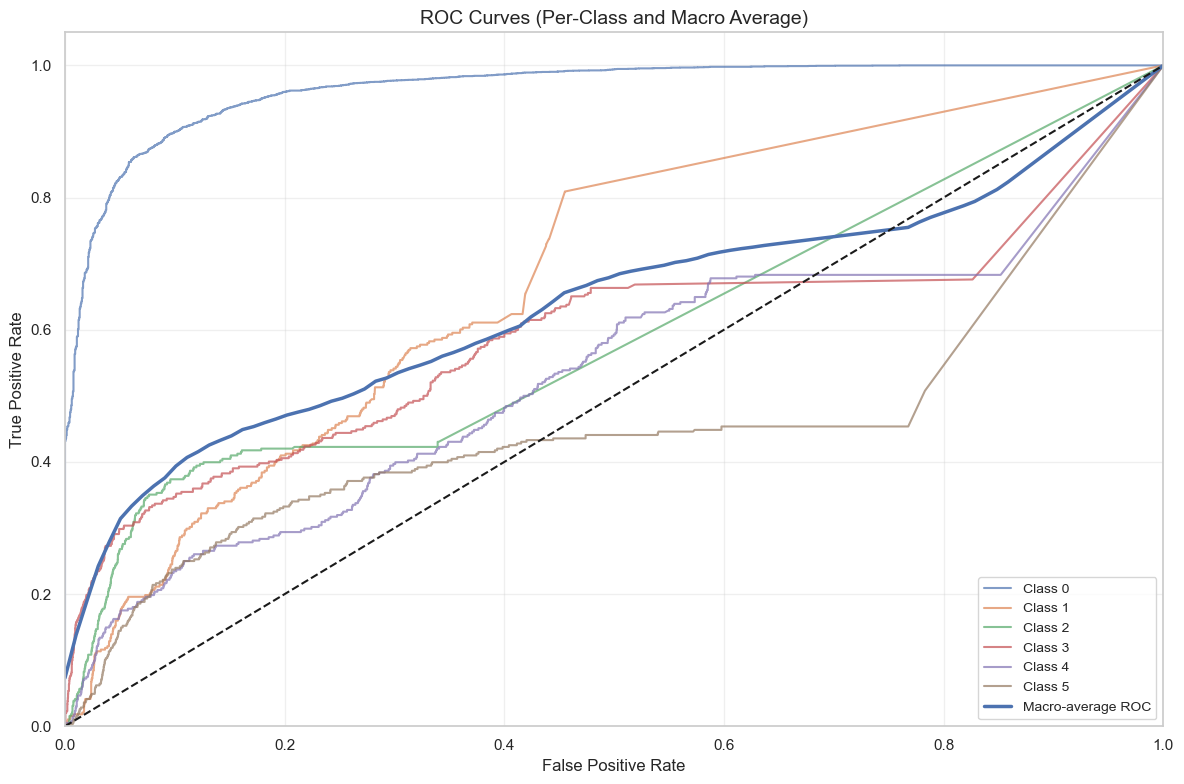

{'best_feature_set': ['Stiffness', 'Upstroke', 'Downstroke2', 'contact_area', 'peak_position', 'cubic_coefficient', 'local_mean_Downstroke2', 'local_gradient_norm_Stiffness', 'local_gradient_norm_Downstroke2', 'stiffness_deviation_from_global', 'stiffness_deviation_from_global_median', 'stiffness_z_score', 'local_Ra_w5', 'local_Ra_w7', 'local_Rq_w3', 'local_Rq_w5', 'local_Rq_w7', 'local_kurtosis_w7', 'local_peak_height_w3', 'local_peak_height_w5', 'local_valley_depth_w5', 'local_valley_depth_w7'], 'best_classifier_type': 'xgb', 'best_params': {'learning_rate': 0.16389182673681812, 'n_estimators': 211, 'max_depth': 10, 'subsample': 0.8338125373939526, 'colsample_bytree': 0.8772531868959561, 'min_child_weight': 5, 'gamma': 0.008996222075940974, 'reg_alpha': 1.6718738072849733, 'reg_lambda': 5.626302153441131}, 'best_binary_f1': 0.8405442841361683, 'test_metrics': {'precision_macro': np.float64(0.31668317134827756), 'recall_macro': np.float64(0.33794575313347347), 'f1_macro': np.float64(0

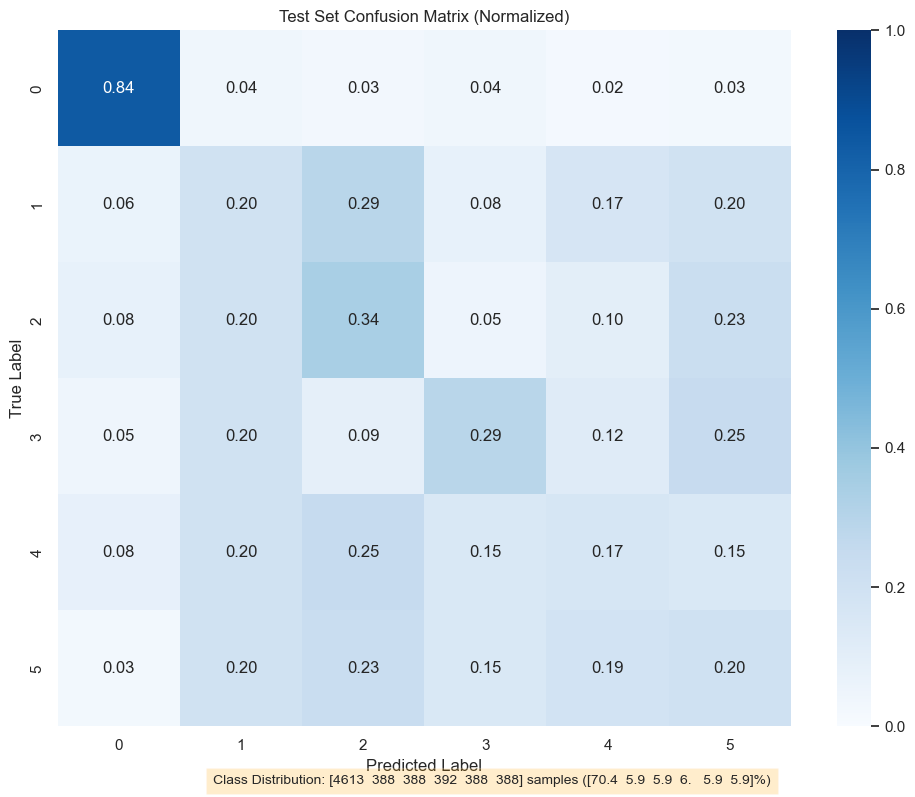

Class distribution: [4613  388  388  392  388  388]
Class percentages: [70.4  5.9  5.9  6.   5.9  5.9]%
Class 0 accuracy: 0.84
Class 1 accuracy: 0.20
Class 2 accuracy: 0.34
Class 3 accuracy: 0.29
Class 4 accuracy: 0.17
Class 5 accuracy: 0.20


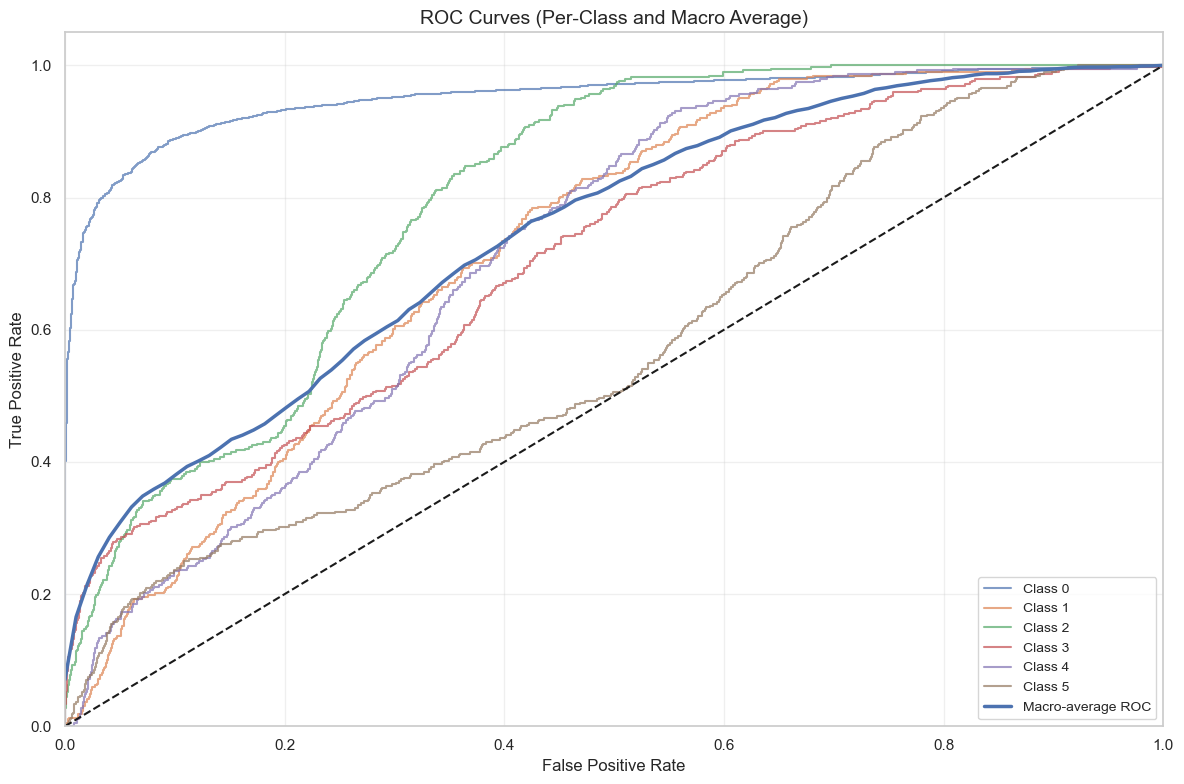

{'best_feature_set': ['Stiffness', 'Upstroke', 'Downstroke2', 'contact_area', 'peak_position', 'cubic_coefficient', 'local_mean_Downstroke2', 'local_gradient_norm_Stiffness', 'local_gradient_norm_Downstroke2', 'stiffness_deviation_from_global', 'stiffness_deviation_from_global_median', 'stiffness_z_score', 'local_Ra_w5', 'local_Ra_w7', 'local_Rq_w3', 'local_Rq_w5', 'local_Rq_w7', 'local_kurtosis_w7', 'local_peak_height_w3', 'local_peak_height_w5', 'local_valley_depth_w5', 'local_valley_depth_w7'], 'best_classifier_type': 'xgb', 'best_params': {'learning_rate': 0.16389182673681812, 'n_estimators': 211, 'max_depth': 10, 'subsample': 0.8338125373939526, 'colsample_bytree': 0.8772531868959561, 'min_child_weight': 5, 'gamma': 0.008996222075940974, 'reg_alpha': 1.6718738072849733, 'reg_lambda': 5.626302153441131}, 'best_binary_f1': 0.8405442841361683, 'test_metrics': {'precision_macro': np.float64(0.31321085197575516), 'recall_macro': np.float64(0.33999619120836394), 'f1_macro': np.float64(0

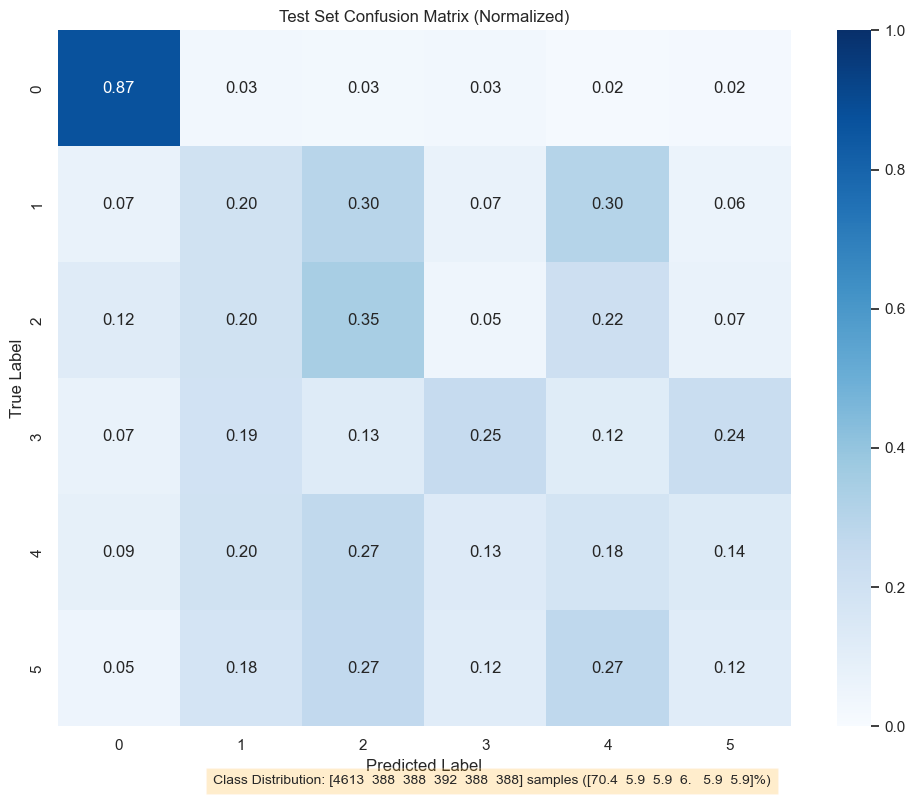

Class distribution: [4613  388  388  392  388  388]
Class percentages: [70.4  5.9  5.9  6.   5.9  5.9]%
Class 0 accuracy: 0.87
Class 1 accuracy: 0.20
Class 2 accuracy: 0.35
Class 3 accuracy: 0.25
Class 4 accuracy: 0.18
Class 5 accuracy: 0.12


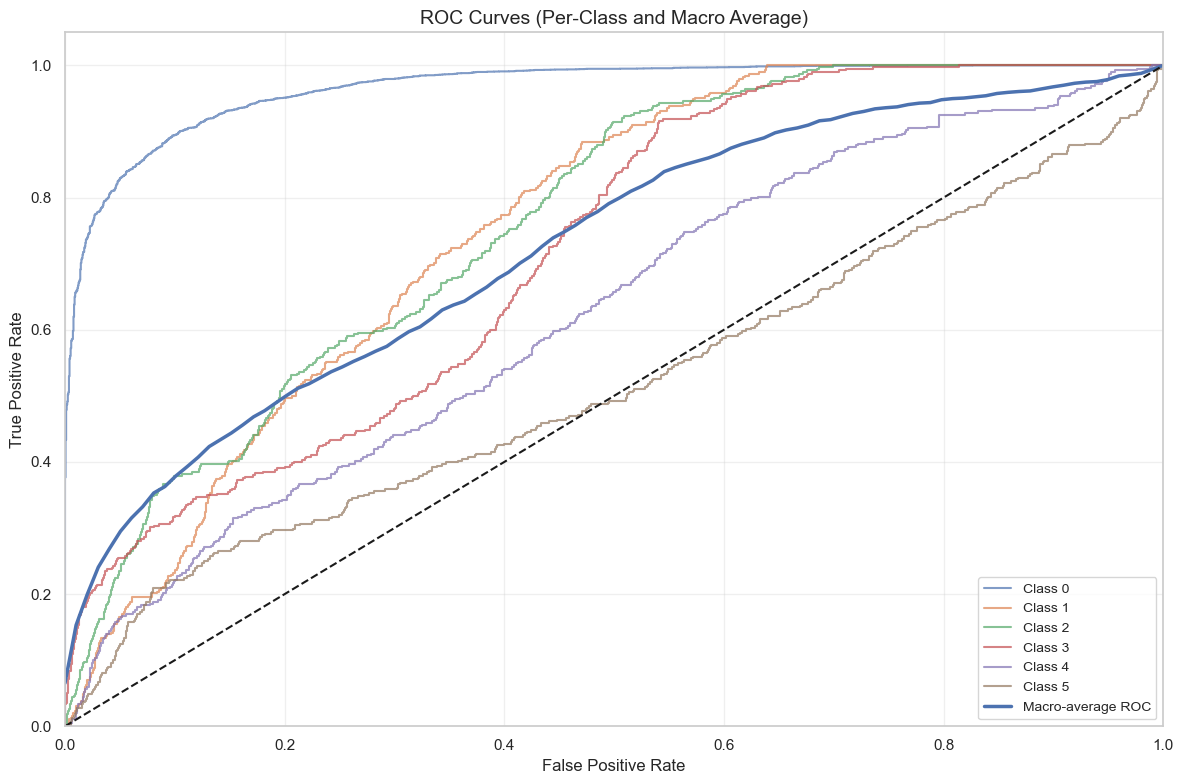

{'best_feature_set': ['Stiffness', 'Upstroke', 'Downstroke2', 'contact_area', 'peak_position', 'cubic_coefficient', 'local_mean_Downstroke2', 'local_gradient_norm_Stiffness', 'local_gradient_norm_Downstroke2', 'stiffness_deviation_from_global', 'stiffness_deviation_from_global_median', 'stiffness_z_score', 'local_Ra_w5', 'local_Ra_w7', 'local_Rq_w3', 'local_Rq_w5', 'local_Rq_w7', 'local_kurtosis_w7', 'local_peak_height_w3', 'local_peak_height_w5', 'local_valley_depth_w5', 'local_valley_depth_w7'], 'best_classifier_type': 'xgb', 'best_params': {'learning_rate': 0.16389182673681812, 'n_estimators': 211, 'max_depth': 10, 'subsample': 0.8338125373939526, 'colsample_bytree': 0.8772531868959561, 'min_child_weight': 5, 'gamma': 0.008996222075940974, 'reg_alpha': 1.6718738072849733, 'reg_lambda': 5.626302153441131}, 'best_binary_f1': 0.8405442841361683, 'test_metrics': {'precision_macro': np.float64(0.30665278052906836), 'recall_macro': np.float64(0.3262241476538365), 'f1_macro': np.float64(0.

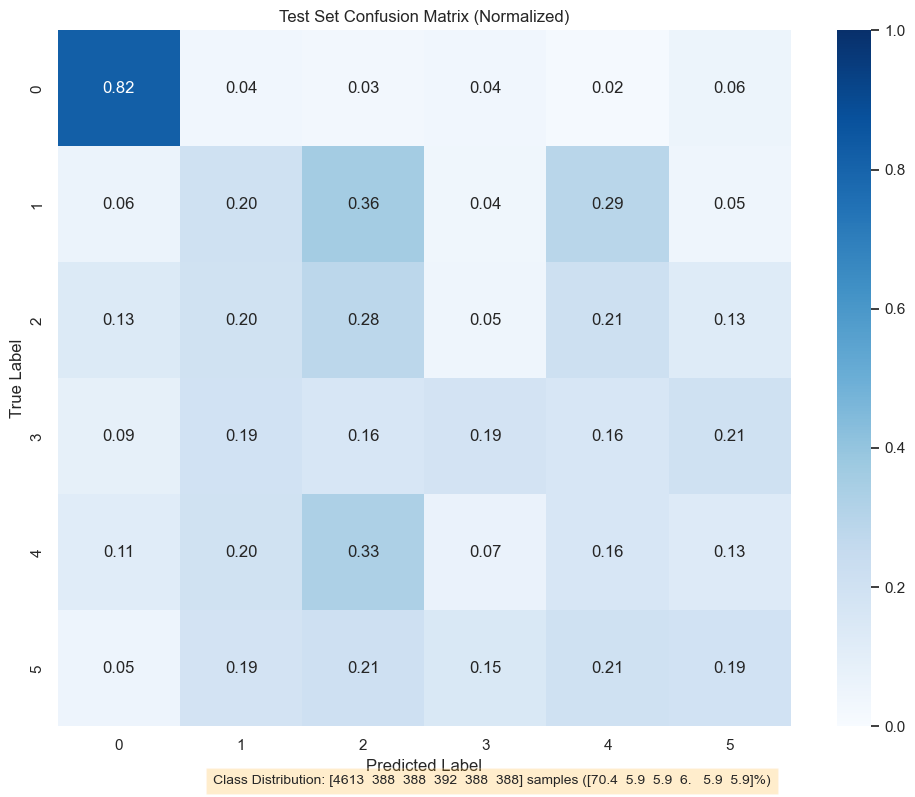

Class distribution: [4613  388  388  392  388  388]
Class percentages: [70.4  5.9  5.9  6.   5.9  5.9]%
Class 0 accuracy: 0.82
Class 1 accuracy: 0.20
Class 2 accuracy: 0.28
Class 3 accuracy: 0.19
Class 4 accuracy: 0.16
Class 5 accuracy: 0.19


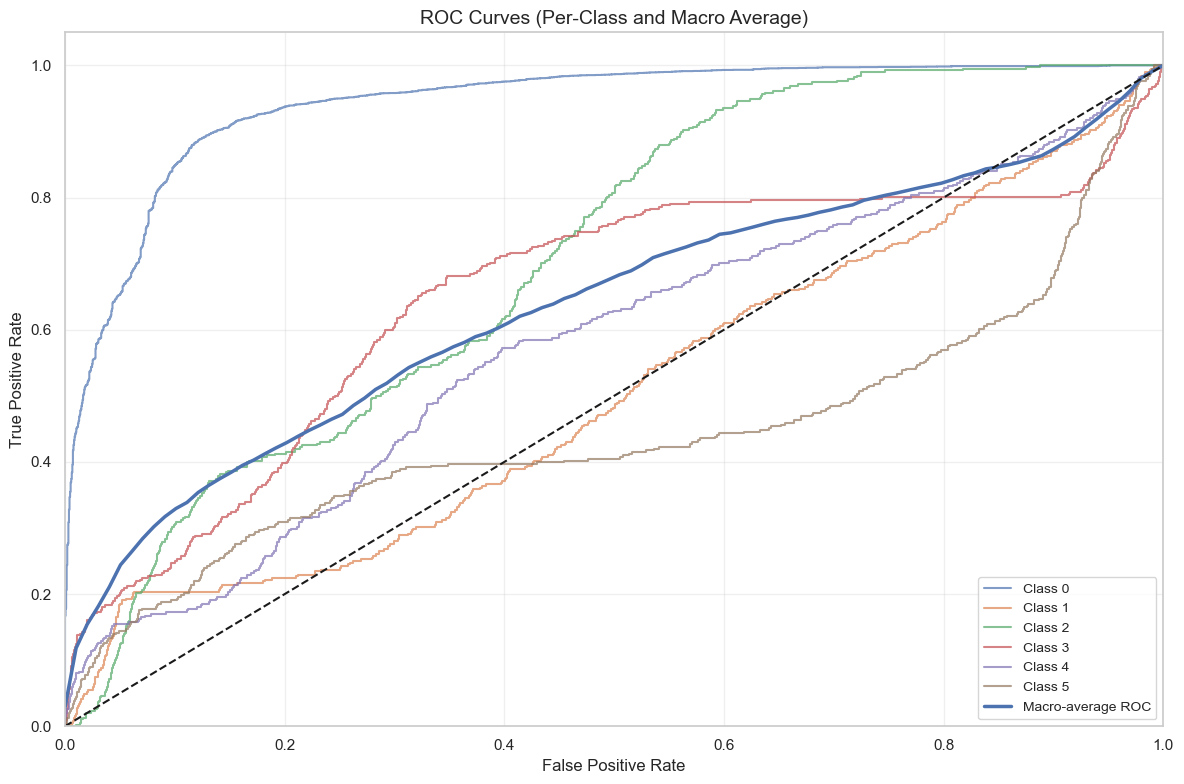

{'best_feature_set': ['Stiffness', 'Upstroke', 'Downstroke2', 'contact_area', 'peak_position', 'cubic_coefficient', 'local_mean_Downstroke2', 'local_gradient_norm_Stiffness', 'local_gradient_norm_Downstroke2', 'stiffness_deviation_from_global', 'stiffness_deviation_from_global_median', 'stiffness_z_score', 'local_Ra_w5', 'local_Ra_w7', 'local_Rq_w3', 'local_Rq_w5', 'local_Rq_w7', 'local_kurtosis_w7', 'local_peak_height_w3', 'local_peak_height_w5', 'local_valley_depth_w5', 'local_valley_depth_w7'], 'best_classifier_type': 'xgb', 'best_params': {'learning_rate': 0.16389182673681812, 'n_estimators': 211, 'max_depth': 10, 'subsample': 0.8338125373939526, 'colsample_bytree': 0.8772531868959561, 'min_child_weight': 5, 'gamma': 0.008996222075940974, 'reg_alpha': 1.6718738072849733, 'reg_lambda': 5.626302153441131}, 'best_binary_f1': 0.8405442841361683, 'test_metrics': {'precision_macro': np.float64(0.28896175919157224), 'recall_macro': np.float64(0.30807189394851225), 'f1_macro': np.float64(0

KeyboardInterrupt: 

In [51]:
# TEST WITH REASONABLE PARAMETER TO SEE IF THE PROBLEM IS OVERFITTING
# Create and train the best classifier
classifier_types = ['rf', 'svc', 'xgb', 'logistic', 'gb']

for clf in classifier_types:
    if clf == 'rf':
        # RandomForestClassifier with parameters to control complexity
        params = {
            'n_estimators': 100,      # Moderate number of trees
            'max_depth': 10,          # Limit depth to prevent overfitting
            'min_samples_split': 5,   # Require more samples to split a node
            'min_samples_leaf': 2,    # Require at least 2 samples in leaf nodes
            'max_features': 'sqrt',   # Use sqrt of total features for each split
            'random_state': 42
        }
        model = RandomForestClassifier(**params)

    elif clf == 'svc':
        # SVC with regularization and RBF kernel
        params = {
            'C': 1.0,                 # Regularization parameter - moderate value
            'kernel': 'rbf',          # Radial basis function kernel
            'gamma': 'scale',         # Kernel coefficient
            'class_weight': 'balanced', # Adjusts for class imbalance
            'probability': True,
            'random_state': 42
        }
        model = SVC(**params)

    elif clf == 'xgb':
        # XGBoost with parameters to control complexity
        params = {
            'n_estimators': 100,      # Moderate number of trees
            'max_depth': 4,           # Shallow trees to prevent overfitting
            'learning_rate': 0.1,     # Smaller learning rate for better generalization
            'subsample': 0.8,         # Use 80% of samples for each tree
            'colsample_bytree': 0.8,  # Use 80% of features for each tree
            'reg_alpha': 0.1,         # L1 regularization
            'reg_lambda': 1.0,        # L2 regularization
            'random_state': 42
        }
        model = xgb.XGBClassifier(**params)

    elif clf == 'logistic':
        # Logistic Regression with L2 regularization
        params = {
            'C': 1.0,                 # Inverse of regularization strength
            'penalty': 'l2',          # L2 regularization
            'solver': 'liblinear',    # Works well for small datasets
            'class_weight': 'balanced', # Adjusts for class imbalance
            'max_iter': 1000,         # Increased iterations for convergence
            'random_state': 42
        }
        model = LogisticRegression(**params)

    else:  # 'gb' - Gradient Boosting
        # GradientBoostingClassifier with parameters to control complexity
        params = {
            'n_estimators': 100,      # Moderate number of trees
            'learning_rate': 0.1,     # Smaller learning rate for better generalization
            'max_depth': 3,           # Shallow trees to prevent overfitting
            'min_samples_split': 5,   # Require more samples to split a node
            'min_samples_leaf': 2,    # Require at least 2 samples in leaf nodes
            'subsample': 0.8,         # Use 80% of samples for each tree
            'random_state': 42
        }
        model = GradientBoostingClassifier(**params)

    #Option 4: Combination of Over and Under Sampling
    from imblearn.over_sampling import SMOTE

    X_train_selected, X_test_selected = X_train[best_feature_set], X_test[best_feature_set]
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)
    model.fit(X_train_resampled, y_train_resampled)

    # Evaluate on test set
    y_pred_test = model.predict(X_test_selected)
    y_proba_test = model.predict_proba(X_test_selected)

    test_metrics = calculate_metrics(y_test, y_pred_test, y_proba_test)

    # Print final results
    print("Test Set Metrics:")
    for key, value in test_metrics.items():
        print(f"{key}: {value:.4f}")

    plot_confusion_matrix(y_test, y_pred_test, title='Test Set Confusion Matrix')

    # Plot ROC curves
    all_classes = np.unique(np.concatenate([y_train, y_test]))
    plot_roc_curves(y_test, y_proba_test, all_classes)

    # Return summary of results
    summary = {
        'best_feature_set': best_feature_set,
        'best_classifier_type': best_classifier_type,
        'best_params': best_params,
        'best_binary_f1': best_f1,
        'test_metrics': test_metrics,
        'model': model
    }

    print(summary)